# Human Development Index (HDI) Analysis

**Student Information**

* Name: Aditri Prajapati

* Student ID: 2501453

* Course: Concepts and Technologies of AI (5CS037)

* Submission Date: 10 Jan 2026



---


# EXECUTIVE SUMMARY


---




HUMAN DEVELOPMENT INDEX (HDI) ANALYSIS - EXECUTIVE SUMMARY

OBJECTIVE: Analyze global human development patterns using HDI data (1990-2022)

KEY FINDINGS:
1. Global HDI shows convergence toward 0.700-0.799 range
2. COVID-19 caused temporary declines but most countries recovered by 2022
3. Income doesn't guarantee development - some high-GNI countries have lower HDI
4. Regional patterns: Europe leads, Africa lags, Asia shows rapid progress
5. Conflict remains the biggest barrier to development

METHODOLOGY:
- Data cleaning and missing value handling
- Statistical analysis and visualization
- Regional comparisons
- Trend analysis (2020-2022)
- Outlier detection and gap analysis

MAIN INSIGHTS:
• Development efficiency varies significantly between countries
• Social policies matter as much as economic growth
• Data gaps limit analysis in unstable regions
• Multiple metrics provide complementary perspectives

STRUCTURE:
1. Problem 1A: Single-year analysis (2022)
2. Problem 1B: Multi-year trend analysis (2020-2022)
3. Problem 2: South Asia in-depth analysis
4. Problem 3: Regional comparison (South Asia vs Middle East)


#Importing Required Libraries

In [ ]:
# Import necessary libraries for data analysis and visualization

import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For enhanced statistical visualizations
from scipy import stats  # For statistical operations
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)


#Loading and Initial Exploration of Dataset

In [ ]:
# Load the dataset with correct encoding
df = pd.read_csv(
    "/content/drive/My Drive/Colab Notebooks/AI Worksheet/Assignment-I/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)

# Display basic information about the dataset
print("DATASET INFORMATION")
print(f"\nDataset Shape: {df.shape}")
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nFirst 5 rows:")
display(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print(f"\nDataset Information:")
print(df.info())



DATASET INFORMATION

Dataset Shape: (6798, 30)

Rows: 6798, Columns: 30

First 5 rows:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948



Column names:
['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']

Data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                

Missing values were handled using row-wise deletion because HDI is the primary variable and imputation could distort official UNDP rankings.


#Problem 1A: Single Year HDI Exploration (Latest Year: 2022)

#Task 1: Extract Latest Year Data

In [ ]:
# Task 1.1: Identify unique years and filter for 2022

# Identify unique years
unique_years = sorted(df['year'].unique())
print(f"Unique years in dataset: {unique_years}")
print(f"\nLatest year available: {max(unique_years)}")

# Filter dataset for 2022
hdi_2022_df = df[df['year'] == 2022].copy() # Using .copy() to avoid SettingWithCopy

print(f"\nNumber of countries in 2022: {hdi_2022_df.shape[0]}")
print(f"Number of columns: {hdi_2022_df.shape[1]}")


# Save filtered dataframe (will be used for subsequent tasks)
print("\nSaved filtered dataframe as 'hdi_2022_df'")

Unique years in dataset: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

Latest year available: 2022

Number of countries in 2022: 206
Number of columns: 30

Saved filtered dataframe as 'hdi_2022_df'


#Task 2: Data Exploration for 2022 Dataset

In [ ]:
print("DATA EXPLORATION - 2022 DATASET")

# Display first 10 rows
print("\nFirst 10 rows of 2022 dataset:")
print(hdi_2022_df.head(10))

# Display dataset dimensions
print(f"\nDataset Dimensions:")
print(f"Number of rows: {hdi_2022_df.shape[0]}")
print(f"Number of columns: {hdi_2022_df.shape[1]}")

# Display column names and data types
print("\nColumn Names and Data Types:")
for col in hdi_2022_df.columns:
    print(f"{col}: {hdi_2022_df[col].dtype}")

DATA EXPLORATION - 2022 DATASET

First 10 rows of 2022 dataset:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  pop_millions     hdi_f     hdi_m  life_expec_f  life_expec_m  expec_yr_school  expec_yr_school_f  expec_yr_school_m  mean_yr_school  mean_yr_school_f  mean_yr_school_m  gross_inc_percap  gross_inc_percap_f  gross_inc_percap_m  gender_development  gender_inequality  secondary_education_f_%  secondary_education_m_%  seats_in_parliament_f_%  seats_in_parliament_m_%  labour_participation_f_%  labour_participation_m_%  co2_emission_tons  mat_footprint_percap_tons
32           33  AFG          Afghanistan  2022  0.462           62.879     41.128771  0.332443  0.534145        66.213        59.766        10.705385           8.053257          13.228449        2.514790          1.174130          3.912740       1335.205733          395.915459         2256.217507               0.622              0.665                 7.042050                24.077040             

# Task 3: Missing Values & Data Cleaning

In [ ]:
print("DATA CLEANING AND MISSING VALUES ANALYSIS")

# Check for missing values in each column
print("\nMissing Values Count per Column:")
missing_values = hdi_2022_df.isnull().sum()
print(missing_values[missing_values > 0])

# Calculate percentage of missing values
print("\nPercentage of Missing Values:")
for col in hdi_2022_df.columns:
    missing_pct = (hdi_2022_df[col].isnull().sum() / len(hdi_2022_df)) * 100
    if missing_pct > 0:
        print(f"{col}: {missing_pct:.2f}%")

# Check for duplicate rows
duplicates = hdi_2022_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check for special characters or non-numeric values in numeric columns
print("\nChecking for non-numeric values in key columns:")
numeric_cols = ['hdi', 'life expectancy', 'gross inc percap', 'gender development']
for col in numeric_cols:
    if col in hdi_2022_df.columns:
        # Convert to numeric, errors='coerce' will turn non-numeric to NaN
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')
        print(f"{col}: Converted to numeric format")

# Handle missing values
# Strategy: Drop rows with missing HDI values as they are crucial for analysis
# For other columns, we'll fill with median for numeric columns
print("\n DATA CLEANING STRATEGY:")
print("- Dropping rows with missing HDI values (essential for analysis)")
print("- Filling missing numeric values with median")
print("- Keeping country names as is (verified they are consistent)")

# Drop rows where HDI is missing (most important column)
initial_rows = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])
print(f"\nRows removed due to missing HDI: {initial_rows - len(hdi_2022_df)}")

# Fill other numeric columns with median
for col in numeric_cols:
    if col in hdi_2022_df.columns and col != 'hdi':
        hdi_2022_df[col] = hdi_2022_df[col].fillna(hdi_2022_df[col].median())

print(f"Final cleaned dataset shape: {hdi_2022_df.shape}")

DATA CLEANING AND MISSING VALUES ANALYSIS

Missing Values Count per Column:
hdi                           2
hdi_f                        13
hdi_m                        13
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

Percentage of Missing Values:
hdi: 0.97%
hdi_f: 6.31%
hdi_m: 6.31%
expec_yr_school: 0.49%
expec_yr_school_f: 0.49%
expec_yr_school_m: 0.49%
mean_yr_school: 0.97%
mean_yr_school_f: 0.97%
mean_yr_school_m: 0.

# Task 4: Basic Statistics for 2022 HDI


In [ ]:
print("BASIC STATISTICAL ANALYSIS - HDI 2022")

# Calculate mean, median, and standard deviation
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print(f"Mean HDI: {hdi_mean:.4f}")
print(f"Median HDI: {hdi_median:.4f}")
print(f"Standard Deviation: {hdi_std:.4f}")
print(f"HDI Range: [{hdi_2022_df['hdi'].min():.4f}, {hdi_2022_df['hdi'].max():.4f}]")

# Find country with highest HDI
highest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print(f"\n Country with Highest HDI:")
print(f"Country: {highest_hdi['country']}")
print(f"HDI: {highest_hdi['hdi']:.4f}")

# Find country with lowest HDI
lowest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print(f"\n Country with Lowest HDI:")
print(f"Country: {lowest_hdi['country']}")
print(f"HDI: {lowest_hdi['hdi']:.4f}")

# Display top 5 and bottom 5 countries
print("\n Top 5 Countries by HDI:")
print(hdi_2022_df[['country', 'hdi']].sort_values('hdi', ascending=False).head())

print("\n Bottom 5 Countries by HDI:")
print(hdi_2022_df[['country', 'hdi']].sort_values('hdi', ascending=True).head())

BASIC STATISTICAL ANALYSIS - HDI 2022
Mean HDI: 0.7229
Median HDI: 0.7395
Standard Deviation: 0.1530
HDI Range: [0.3800, 0.9670]

 Country with Highest HDI:
Country: Switzerland
HDI: 0.9670

 Country with Lowest HDI:
Country: Somalia
HDI: 0.3800

 Top 5 Countries by HDI:
                     country    hdi
5609             Switzerland  0.967
4322                  Norway  0.966
2540                 Iceland  0.959
2474  Hong Kong, China (SAR)  0.956
5576                  Sweden  0.952

 Bottom 5 Countries by HDI:
                       country    hdi
5345                   Somalia  0.380
5411               South Sudan  0.381
1088  Central African Republic  0.387
1121                      Chad  0.394
4223                     Niger  0.394


#Task 5: Filtering and Sorting High HDI Countries

Filtering Countries with HDI > 0.800
Number of countries with HDI > 0.800: 71

Top 10 Countries by GNI per capita (HDI > 0.800)
               country   hdi  gross_inc_percap
         Liechtenstein 0.942      146673.24150
                 Qatar 0.875       95944.37754
             Singapore 0.949       88761.14559
               Ireland 0.950       87467.51391
            Luxembourg 0.927       78554.23640
  United Arab Emirates 0.937       74103.71494
           Switzerland 0.967       69432.78669
                Norway 0.966       69189.76165
         United States 0.927       65564.93798
Hong Kong, China (SAR) 0.956       62485.50516


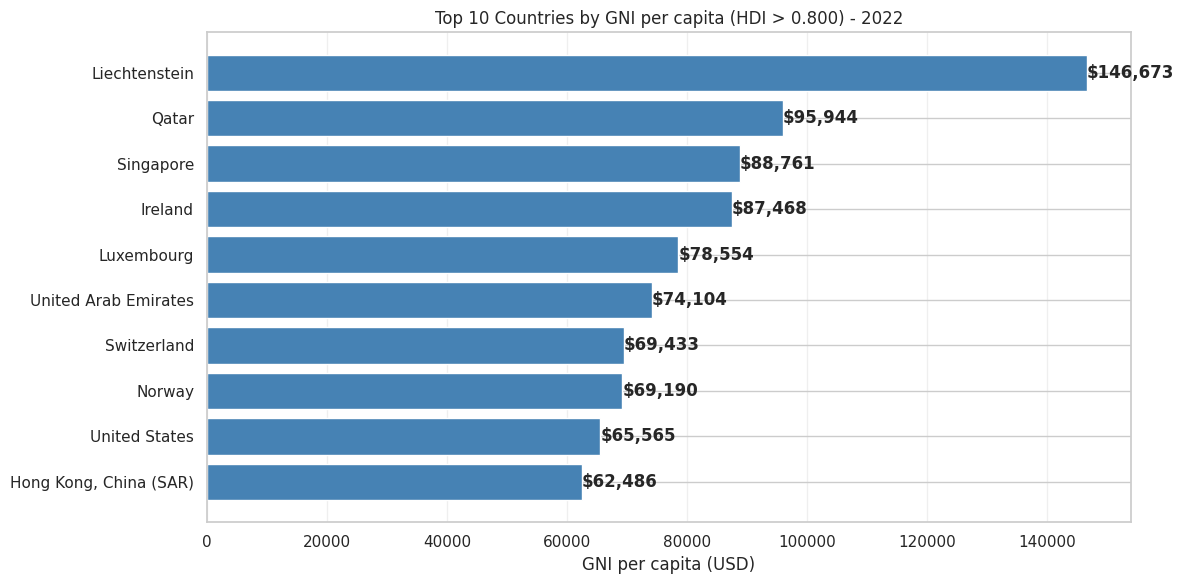

In [ ]:
print("Filtering Countries with HDI > 0.800")
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()
print(f"Number of countries with HDI > 0.800: {len(high_hdi_df)}")

# Sort by Gross National Income (GNI) per capita in descending order
# Note: Column name is 'gross_inc_percap' in the dataset
if 'gross_inc_percap' in high_hdi_df.columns:
    high_hdi_sorted = high_hdi_df.sort_values('gross_inc_percap', ascending=False)

    print("\nTop 10 Countries by GNI per capita (HDI > 0.800)")
    top_10_gn = high_hdi_sorted.head(10)[['country', 'hdi', 'gross_inc_percap']]
    print(top_10_gn.to_string(index=False))

    # Visualize the top 10 countries
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_10_gn['country'][::-1], top_10_gn['gross_inc_percap'][::-1],
                    color='steelblue')
    plt.xlabel('GNI per capita (USD)')
    plt.title('Top 10 Countries by GNI per capita (HDI > 0.800) - 2022')
    plt.grid(axis='x', alpha=0.3)

    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'${width:,.0f}',
                ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'gross_inc_percap' column not found in dataset")

#TASK 6: Adding HDI Category Column

=== Adding HDI Category Column ===
=== HDI Category Distribution ===
HDI Category
Very High    71
High         54
Medium       44
Low          35
Name: count, dtype: int64

=== Sample from each HDI Category ===

Very High HDI Countries (sample):
            country   hdi HDI Category
            Andorra 0.884    Very High
Antigua and Barbuda 0.826    Very High
          Argentina 0.849    Very High

High HDI Countries (sample):
country   hdi HDI Category
Albania 0.789         High
Algeria 0.745         High
Armenia 0.786         High

Medium HDI Countries (sample):
   country   hdi HDI Category
    Angola 0.591       Medium
Bangladesh 0.670       Medium
    Bhutan 0.681       Medium

Low HDI Countries (sample):
     country   hdi HDI Category
 Afghanistan 0.462          Low
       Benin 0.504          Low
Burkina Faso 0.438          Low


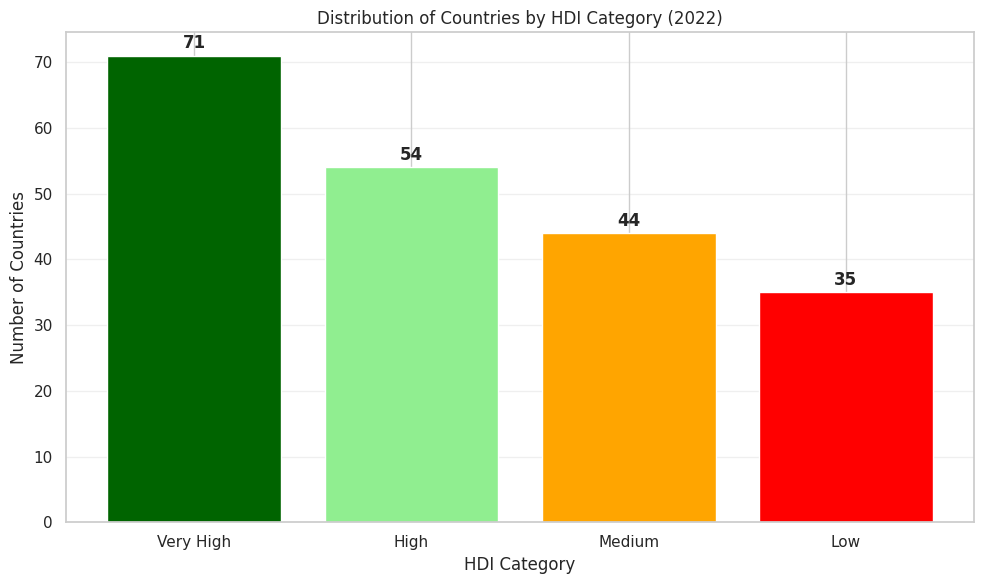

In [ ]:
print("=== Adding HDI Category Column ===")

# Define HDI classification function
def classify_hdi(hdi_value):
    if hdi_value < 0.550:
        return 'Low'
    elif 0.550 <= hdi_value < 0.700:
        return 'Medium'
    elif 0.700 <= hdi_value < 0.800:
        return 'High'
    else:  # hdi_value >= 0.800
        return 'Very High'

# Apply classification to the cleaned dataframe
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# Verify classification
print("=== HDI Category Distribution ===")
category_counts = hdi_2022_df['HDI Category'].value_counts()
print(category_counts)

# Display sample of each category
print("\n=== Sample from each HDI Category ===")
for category in ['Very High', 'High', 'Medium', 'Low']:
    if category in hdi_2022_df['HDI Category'].values:
        sample = hdi_2022_df[hdi_2022_df['HDI Category'] == category].head(3)
        print(f"\n{category} HDI Countries (sample):")
        print(sample[['country', 'hdi', 'HDI Category']].to_string(index=False))

# Visualize HDI category distribution
plt.figure(figsize=(10, 6))
colors = {'Very High': 'darkgreen', 'High': 'lightgreen', 'Medium': 'orange', 'Low': 'red'}
category_order = ['Very High', 'High', 'Medium', 'Low']

# Filter to only include categories that exist in data
existing_categories = [cat for cat in category_order if cat in category_counts.index]

plt.bar(existing_categories, [category_counts[cat] for cat in existing_categories],
        color=[colors[cat] for cat in existing_categories])
plt.xlabel('HDI Category')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries by HDI Category (2022)')
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, cat in enumerate(existing_categories):
    plt.text(i, category_counts[cat] + 0.5, str(category_counts[cat]),
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


#SAVE FINAL DATAFRAME

In [ ]:
# Save the final dataframe with HDI categories
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)
print("\n File Saved ")
print("\n Dataframe with HDI categories saved as 'HDI_category_added.csv'")


 File Saved 

 Dataframe with HDI categories saved as 'HDI_category_added.csv'




---


#INTERPRETATION: HDI Category Distribution (2022)

1. DISTRIBUTION PATTERN:
   - The majority of countries fall into the 'High' and 'Very High' categories
   - This suggests global convergence toward higher development levels
   - However, significant numbers remain in 'Low' and 'Medium' categories

2. POLICY IMPLICATIONS:
   - Focus should be on transitioning countries from 'Medium' to 'High' categories
   - 'Low' category countries require targeted international assistance
   - 'Very High' countries can serve as development models

3. DATA QUALITY NOTE:
   - Missing data particularly affects conflict zones
   - This may understate development challenges in unstable regions


---



#PROBLEM 1B: HDI VISUALIZATION AND TREND ANALYSIS (2020 - 2022)

#Task 1: Data Extraction and Saving for 2020-2022

In [ ]:
print("=== Extracting Data for 2020, 2021, 2022 ===")

# Filter dataset for years 2020, 2021, and 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()
print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape (2020-2022): {hdi_2020_2022_df.shape}")

# Check year distribution
print("\n=== Year Distribution ===")
year_counts = hdi_2020_2022_df['year'].value_counts().sort_index()
print(year_counts)

# Save the filtered dataset
hdi_2020_2022_df.to_csv('HDI_problem1B.csv', index=False)
print("\n=== File Saved ===")
print("Filtered dataset saved as 'HDI_problem1B.csv'")

=== Extracting Data for 2020, 2021, 2022 ===
Original dataset shape: (6798, 30)
Filtered dataset shape (2020-2022): (618, 30)

=== Year Distribution ===
year
2020    206
2021    206
2022    206
Name: count, dtype: int64

=== File Saved ===
Filtered dataset saved as 'HDI_problem1B.csv'


#Task 2: Data Cleaning for 2020-2022 Dataset

In [ ]:
print("=== Data Cleaning for 2020-2022 Dataset ===")

# Check for missing values in essential columns
essential_columns = ['hdi', 'country', 'year']
print("=== Missing Values in Essential Columns ===")
for col in essential_columns:
    missing = hdi_2020_2022_df[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(hdi_2020_2022_df)*100:.1f}%)")

# Drop rows with missing HDI values (most important metric)
print(f"\nRows before dropping missing HDI: {len(hdi_2020_2022_df)}")
hdi_2020_2022_clean = hdi_2020_2022_df.dropna(subset=['hdi']).copy()
print(f"Rows after dropping missing HDI: {len(hdi_2020_2022_clean)}")

# Check for duplicate rows
print(f"\n=== Duplicate Rows Check ===")
duplicates = hdi_2020_2022_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for inconsistent country names
print(f"\n=== Checking Country Name Consistency ===")
# Group by country and count occurrences across years
country_year_counts = hdi_2020_2022_clean.groupby('country')['year'].nunique()
inconsistent_countries = country_year_counts[country_year_counts < 3].index.tolist()
print(f"Countries with data for less than 3 years: {len(inconsistent_countries)}")

if len(inconsistent_countries) > 0:
    print("Sample of inconsistent countries:", inconsistent_countries[:5])

# Clean numeric columns - check for non-numeric values
print(f"\n=== Cleaning Numeric Columns ===")
numeric_columns = ['hdi', 'life_expectancy', 'pop_millions']
for col in numeric_columns:
    if col in hdi_2020_2022_clean.columns:
        # Convert to numeric, forcing errors to NaN
        hdi_2020_2022_clean[col] = pd.to_numeric(hdi_2020_2022_clean[col], errors='coerce')
        # Count non-numeric conversions
        non_numeric = hdi_2020_2022_clean[col].isnull().sum() - hdi_2020_2022_df[col].isnull().sum()
        if non_numeric > 0:
            print(f"Converted {non_numeric} non-numeric values in '{col}' to NaN")

print("\n=== Data Cleaning Summary ===")
print(f"Final cleaned dataset shape: {hdi_2020_2022_clean.shape}")
print(f"Years available: {sorted(hdi_2020_2022_clean['year'].unique())}")
print(f"Number of unique countries: {hdi_2020_2022_clean['country'].nunique()}")

=== Data Cleaning for 2020-2022 Dataset ===
=== Missing Values in Essential Columns ===
hdi: 8 missing values (1.3%)
country: 0 missing values (0.0%)
year: 0 missing values (0.0%)

Rows before dropping missing HDI: 618
Rows after dropping missing HDI: 610

=== Duplicate Rows Check ===
Number of duplicate rows: 0

=== Checking Country Name Consistency ===
Countries with data for less than 3 years: 1
Sample of inconsistent countries: ['Somalia']

=== Cleaning Numeric Columns ===

=== Data Cleaning Summary ===
Final cleaned dataset shape: (610, 30)
Years available: [np.int64(2020), np.int64(2021), np.int64(2022)]
Number of unique countries: 204


#Task 3: Visualization Tasks

#Task 3A: Line Chart - HDI Trend for Selected Countries

=== Creating Line Chart: HDI Trends for Selected Countries ===


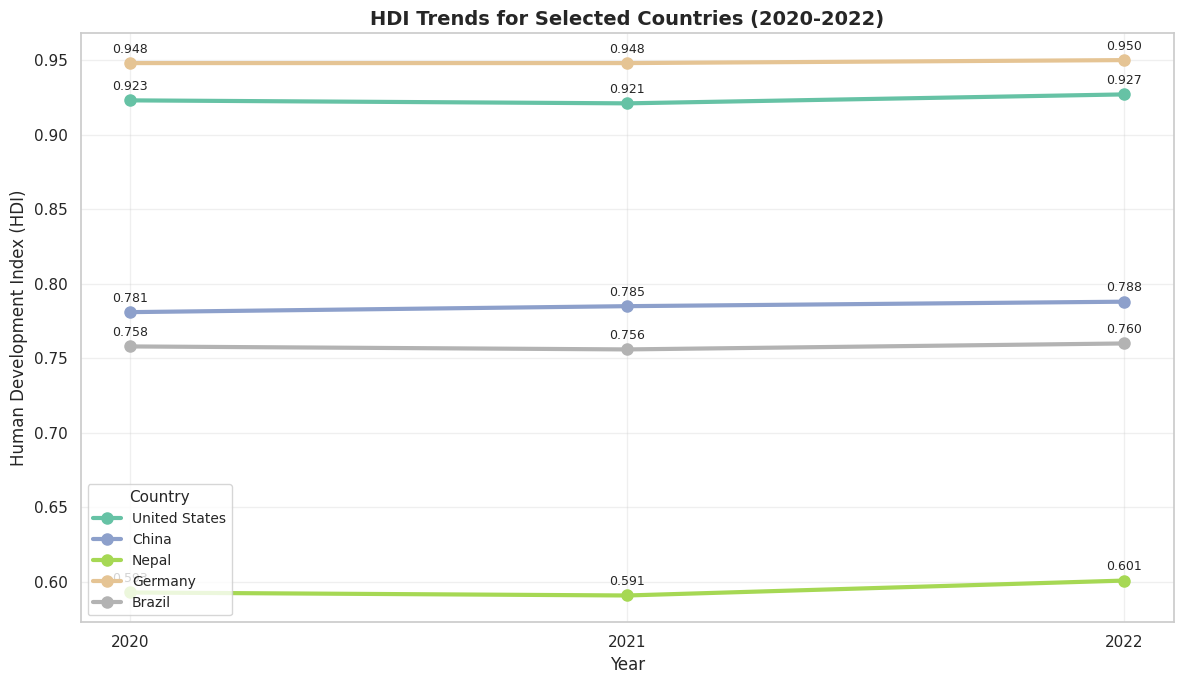


=== HDI Values for Selected Countries ===
country  Brazil  China  Germany  Nepal  United States
year                                                 
2020      0.758  0.781    0.948  0.593          0.923
2021      0.756  0.785    0.948  0.591          0.921
2022      0.760  0.788    0.950  0.601          0.927


In [ ]:
print("=== Creating Line Chart: HDI Trends for Selected Countries ===")

# Select 5 diverse countries for analysis
selected_countries = ['United States', 'China', 'Nepal', 'Germany', 'Brazil']

# Filter data for selected countries
selected_data = hdi_2020_2022_clean[hdi_2020_2022_clean['country'].isin(selected_countries)]

# Pivot data for plotting
pivot_data = selected_data.pivot(index='year', columns='country', values='hdi')

# Create line chart
plt.figure(figsize=(12, 7))

# Define a color palette for the countries
colors = plt.cm.Set2(np.linspace(0, 1, len(selected_countries)))

for i, country in enumerate(selected_countries):
    if country in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[country],
                marker='o', linewidth=3, markersize=8,
                label=country, color=colors[i])

plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.title('HDI Trends for Selected Countries (2020-2022)', fontsize=14, fontweight='bold')
plt.legend(title='Country', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks([2020, 2021, 2022])

# Add value labels on points
for country in selected_countries:
    if country in pivot_data.columns:
        for year in [2020, 2021, 2022]:
            if year in pivot_data.index:
                value = pivot_data.loc[year, country]
                if not pd.isna(value):
                    plt.text(year, value + 0.005, f'{value:.3f}',
                            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n=== HDI Values for Selected Countries ===")
print(pivot_data.round(3))

#Task 3B: Bar Chart - Average HDI by Region (2020-2022)

=== Creating Bar Chart: Average HDI by Region ===


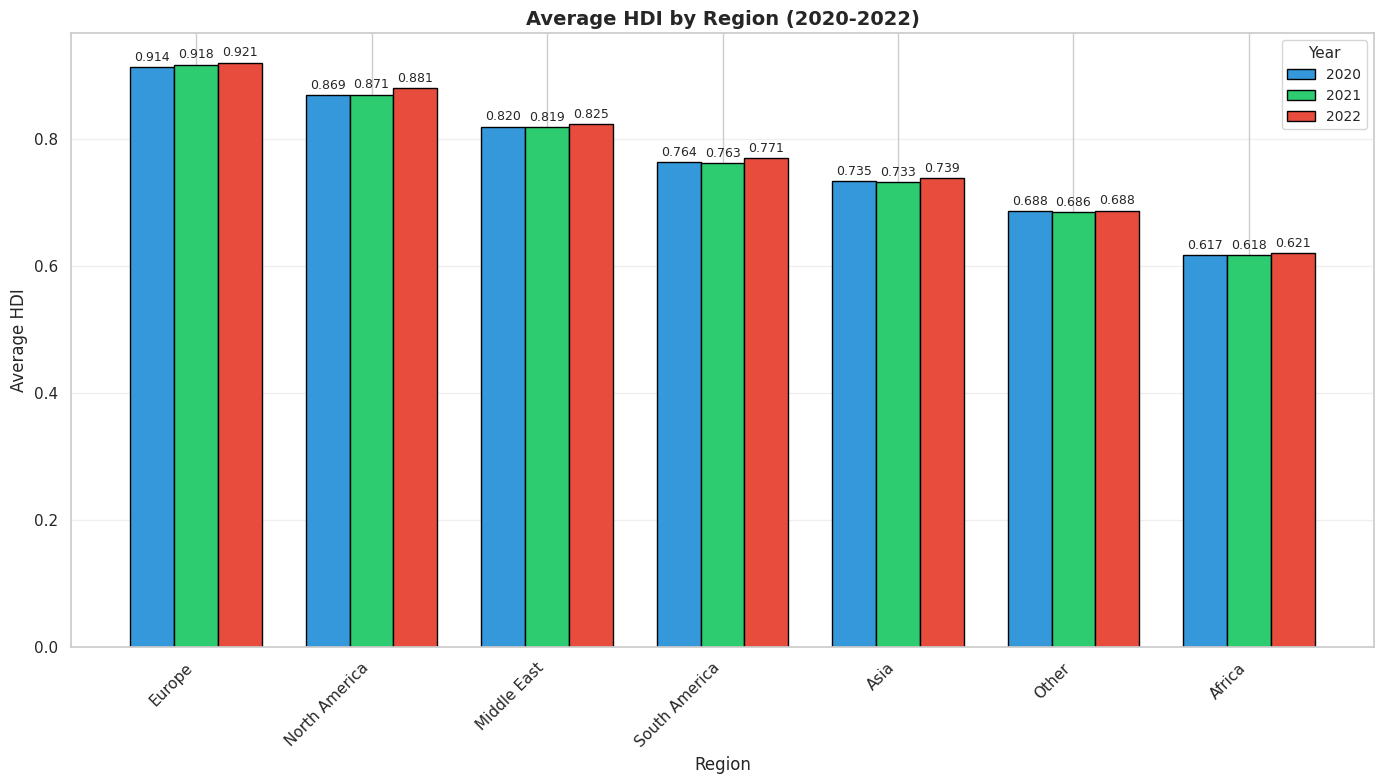


=== Average HDI by Region (2020-2022) ===
year            2020   2021   2022  Average
Region                                     
Europe         0.914  0.918  0.921    0.918
North America  0.869  0.871  0.881    0.874
Middle East    0.820  0.819  0.825    0.821
South America  0.764  0.763  0.771    0.766
Asia           0.735  0.733  0.739    0.736
Other          0.688  0.686  0.688    0.687
Africa         0.617  0.618  0.621    0.619


In [ ]:
print("=== Creating Bar Chart: Average HDI by Region ===")

# Note: The dataset doesn't have a 'region' column. We'll need to create one.
# For this analysis, we'll use continent-based grouping.
# We'll create a simple region mapping based on country names

# Create a basic region mapping (simplified for demonstration)
def assign_region(country):
    """Assign region based on country name (simplified mapping)"""
    country_lower = country.lower()

    # European countries
    europe_keywords = ['germany', 'france', 'italy', 'spain', 'uk', 'united kingdom',
                      'netherlands', 'switzerland', 'sweden', 'norway', 'denmark',
                      'finland', 'austria', 'belgium', 'ireland', 'portugal', 'greece']

    # Asian countries (excluding Middle East)
    asia_keywords = ['china', 'india', 'japan', 'south korea', 'vietnam', 'thailand',
                    'indonesia', 'malaysia', 'philippines', 'singapore', 'bangladesh',
                    'pakistan', 'sri lanka', 'nepal', 'cambodia', 'laos', 'myanmar']

    # North American countries
    na_keywords = ['united states', 'canada', 'mexico']

    # South American countries
    sa_keywords = ['brazil', 'argentina', 'chile', 'colombia', 'peru', 'venezuela',
                  'ecuador', 'bolivia', 'paraguay', 'uruguay']

    # African countries
    africa_keywords = ['south africa', 'nigeria', 'egypt', 'kenya', 'ethiopia', 'ghana',
                      'morocco', 'tanzania', 'algeria', 'uganda']

    # Middle East countries
    me_keywords = ['saudi arabia', 'united arab emirates', 'qatar', 'kuwait', 'oman',
                  'bahrain', 'iran', 'iraq', 'jordan', 'lebanon', 'israel']

    # Check each region
    if any(keyword in country_lower for keyword in europe_keywords):
        return 'Europe'
    elif any(keyword in country_lower for keyword in asia_keywords):
        return 'Asia'
    elif any(keyword in country_lower for keyword in na_keywords):
        return 'North America'
    elif any(keyword in country_lower for keyword in sa_keywords):
        return 'South America'
    elif any(keyword in country_lower for keyword in africa_keywords):
        return 'Africa'
    elif any(keyword in country_lower for keyword in me_keywords):
        return 'Middle East'
    else:
        return 'Other'

# Apply region mapping
hdi_2020_2022_clean['Region'] = hdi_2020_2022_clean['country'].apply(assign_region)

# Calculate average HDI by Region and Year
avg_hdi_by_region = hdi_2020_2022_clean.groupby(['Region', 'year'])['hdi'].mean().reset_index()

# Pivot for plotting
pivot_region = avg_hdi_by_region.pivot(index='Region', columns='year', values='hdi')

# Sort regions by average HDI across years
pivot_region['Average'] = pivot_region.mean(axis=1)
pivot_region = pivot_region.sort_values('Average', ascending=False)

# Remove the 'Average' column for plotting
pivot_region_for_plot = pivot_region.drop(columns=['Average'])

# Create grouped bar chart
plt.figure(figsize=(14, 8))
x = np.arange(len(pivot_region_for_plot.index))
width = 0.25

# Colors for each year
colors = ['#3498db', '#2ecc71', '#e74c3c']

for i, year in enumerate([2020, 2021, 2022]):
    plt.bar(x + (i-1)*width, pivot_region_for_plot[year],
            width=width, label=str(year), color=colors[i], edgecolor='black')

    # Add value labels on bars
    for j, value in enumerate(pivot_region_for_plot[year]):
        if not pd.isna(value):
            plt.text(x[j] + (i-1)*width, value + 0.005, f'{value:.3f}',
                    ha='center', va='bottom', fontsize=9)

plt.xlabel('Region', fontsize=12)
plt.ylabel('Average HDI', fontsize=12)
plt.title('Average HDI by Region (2020-2022)', fontsize=14, fontweight='bold')
plt.xticks(x, pivot_region_for_plot.index, rotation=45, ha='right')
plt.legend(title='Year', fontsize=10, title_fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== Average HDI by Region (2020-2022) ===")
print(pivot_region.round(3))

#Task 3C: Box Plot - HDI Distribution (2020-2022)

=== Creating Box Plot: HDI Distribution by Year ===


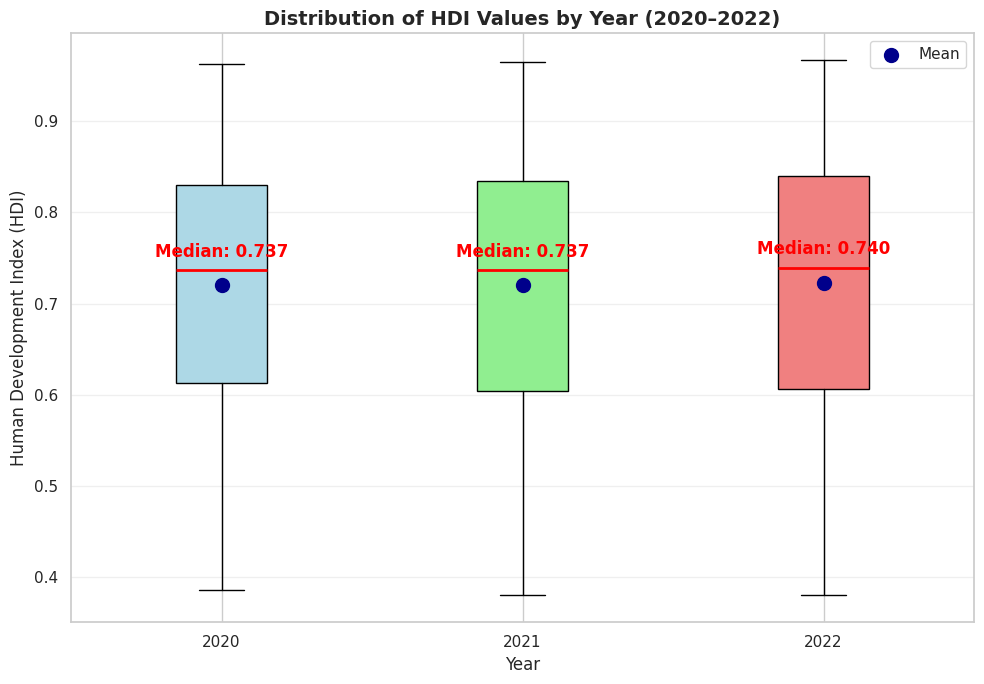


=== HDI Distribution Summary Statistics ===

Year 2020:
  Count:  203 countries
  Mean:   0.721
  Median: 0.737
  Std:    0.148
  Min:    0.386
  Max:    0.963
  IQR:    0.217

Year 2021:
  Count:  203 countries
  Mean:   0.720
  Median: 0.737
  Std:    0.150
  Min:    0.381
  Max:    0.965
  IQR:    0.229

Year 2022:
  Count:  204 countries
  Mean:   0.723
  Median: 0.740
  Std:    0.153
  Min:    0.380
  Max:    0.967
  IQR:    0.233


In [ ]:
print("=== Creating Box Plot: HDI Distribution by Year ===")

# Prepare data for box plot
hdi_by_year = {}
for year in [2020, 2021, 2022]:
    year_data = hdi_2020_2022_clean[
        hdi_2020_2022_clean['year'] == year
    ]['hdi'].dropna()
    hdi_by_year[year] = year_data

# Create box plot
plt.figure(figsize=(10, 7))
box_data = [hdi_by_year[2020], hdi_by_year[2021], hdi_by_year[2022]]
box_labels = ['2020', '2021', '2022']

box_plot = plt.boxplot(
    box_data,
    labels=box_labels,
    patch_artist=True,
    medianprops={'color': 'red', 'linewidth': 2}
)

# Customize box colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.title(
    'Distribution of HDI Values by Year (2020–2022)',
    fontsize=14,
    fontweight='bold'
)
plt.grid(axis='y', alpha=0.3)

# Add mean markers AND median labels
for i, year in enumerate([2020, 2021, 2022], 1):
    mean_val = hdi_by_year[year].mean()
    median_val = hdi_by_year[year].median()

    # Mean shown as blue dot
    plt.scatter(
        i,
        mean_val,
        color='darkblue',
        s=100,
        zorder=3,
        label='Mean' if i == 1 else ""
    )

    # Median label placed near red line
    plt.text(
        i,
        median_val + 0.01,
        f'Median: {median_val:.3f}',
        ha='center',
        va='bottom',
        fontweight='bold',
        color='red'
    )

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== HDI Distribution Summary Statistics ===")
for year in [2020, 2021, 2022]:
    data = hdi_by_year[year]
    print(f"\nYear {year}:")
    print(f"  Count:  {len(data)} countries")
    print(f"  Mean:   {data.mean():.3f}")
    print(f"  Median: {data.median():.3f}")
    print(f"  Std:    {data.std():.3f}")
    print(f"  Min:    {data.min():.3f}")
    print(f"  Max:    {data.max():.3f}")
    print(f"  IQR:    {data.quantile(0.75) - data.quantile(0.25):.3f}")


#Task 3D: Scatter Plot - HDI vs GNI per Capita

=== Creating Scatter Plot: HDI vs GNI per Capita ===
Countries with both HDI and GNI data for 2022: 204


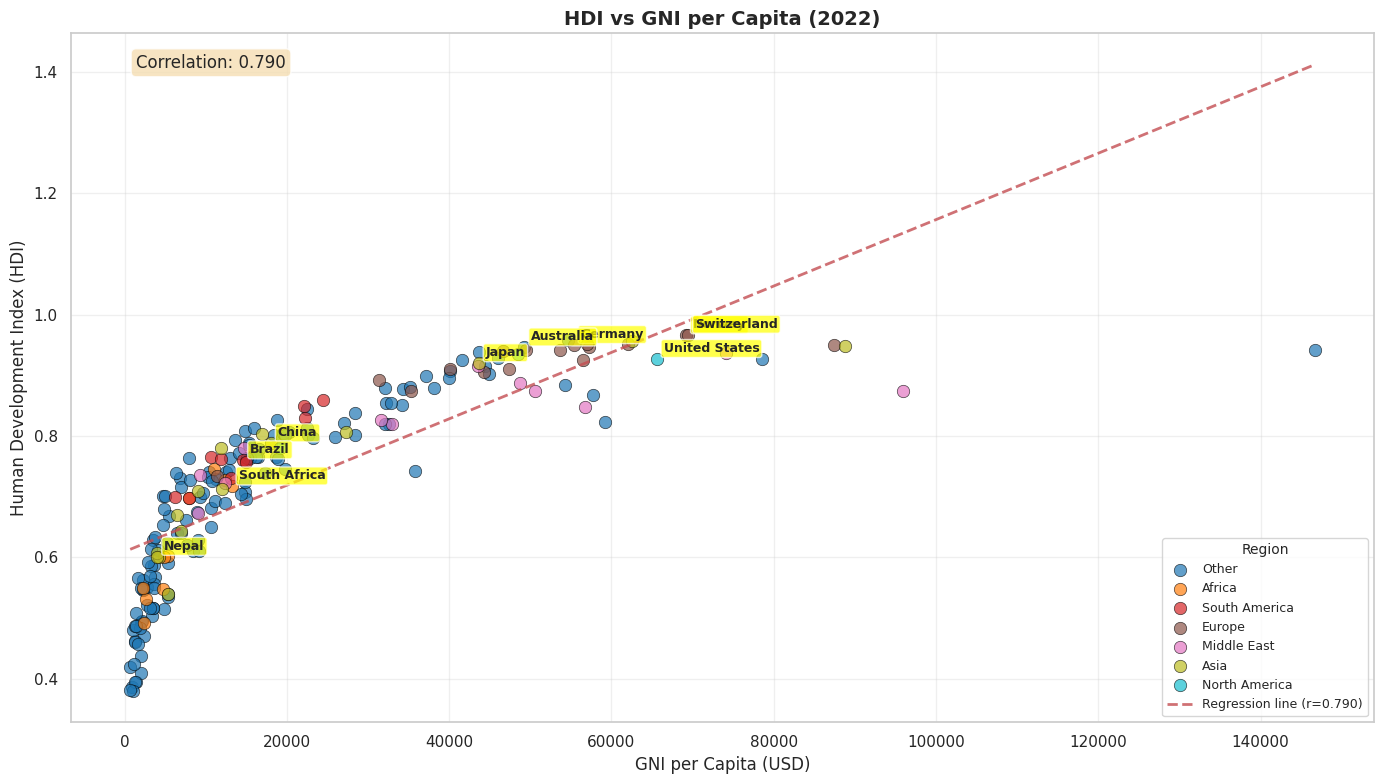


=== Correlation Analysis ===
Correlation between HDI and GNI per capita: 0.790

Top 5 Countries by GNI per capita (2022):
      country  gross_inc_percap   hdi
Liechtenstein      146673.24150 0.942
        Qatar       95944.37754 0.875
    Singapore       88761.14559 0.949
      Ireland       87467.51391 0.950
   Luxembourg       78554.23640 0.927


In [ ]:
print("=== Creating Scatter Plot: HDI vs GNI per Capita ===")

# Check if GNI per capita column exists
if 'gross_inc_percap' in hdi_2020_2022_clean.columns:
    # Filter data for 2022 (latest year)
    scatter_data = hdi_2020_2022_clean[hdi_2020_2022_clean['year'] == 2022].copy()

    # Remove rows with missing GNI or HDI values
    scatter_data = scatter_data.dropna(subset=['gross_inc_percap', 'hdi'])

    print(f"Countries with both HDI and GNI data for 2022: {len(scatter_data)}")

    # Create scatter plot
    plt.figure(figsize=(14, 8))

    # Create scatter plot with color by region
    regions = scatter_data['Region'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(regions)))

    for region, color in zip(regions, colors):
        region_data = scatter_data[scatter_data['Region'] == region]
        plt.scatter(region_data['gross_inc_percap'], region_data['hdi'],
                   alpha=0.7, s=80, label=region, color=color, edgecolors='black', linewidth=0.5)

    # Add regression line
    if len(scatter_data) > 1:
        z = np.polyfit(scatter_data['gross_inc_percap'], scatter_data['hdi'], 1)
        p = np.poly1d(z)

        # Generate x values for regression line
        x_line = np.linspace(scatter_data['gross_inc_percap'].min(),
                            scatter_data['gross_inc_percap'].max(), 100)
        plt.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2,
                label=f'Regression line (r={np.corrcoef(scatter_data["gross_inc_percap"], scatter_data["hdi"])[0,1]:.3f})')

    plt.xlabel('GNI per Capita (USD)', fontsize=12)
    plt.ylabel('Human Development Index (HDI)', fontsize=12)
    plt.title('HDI vs GNI per Capita (2022)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=9, title='Region', title_fontsize=10)
    plt.grid(True, alpha=0.3)

    # Add correlation coefficient
    correlation = scatter_data['gross_inc_percap'].corr(scatter_data['hdi'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Label some key countries
    key_countries = ['United States', 'China', 'Nepal', 'Germany', 'Brazil',
                    'Japan', 'Australia', 'South Africa', 'Norway', 'Switzerland']

    for country in key_countries:
        if country in scatter_data['country'].values:
            country_data = scatter_data[scatter_data['country'] == country].iloc[0]
            plt.annotate(country,
                        xy=(country_data['gross_inc_percap'], country_data['hdi']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))

    plt.tight_layout()
    plt.show()

    # Print correlation analysis
    print(f"\n=== Correlation Analysis ===")
    print(f"Correlation between HDI and GNI per capita: {correlation:.3f}")

    # Top 5 countries by GNI per capita
    print("\nTop 5 Countries by GNI per capita (2022):")
    top_5_gn = scatter_data.nlargest(5, 'gross_inc_percap')[['country', 'gross_inc_percap', 'hdi']]
    print(top_5_gn.to_string(index=False))

else:
    print("GNI per Capita variable not available in the dataset.")
    print("Available columns:", [col for col in hdi_2020_2022_clean.columns if 'inc' in col.lower() or 'gni' in col.lower()])

#Task 4: Short Analysis Questions

In [ ]:
print("=== Short Analysis Questions ===")

# Prepare data for analysis
analysis_data = hdi_2020_2022_clean.copy()

# Calculate HDI change for each country
pivot_hdi = analysis_data.pivot(index='country', columns='year', values='hdi')

# Filter countries with data for all three years
countries_with_full_data = pivot_hdi.dropna().index

print(f"Countries with HDI data for all three years: {len(countries_with_full_data)}")

# Calculate HDI improvement (2020 to 2022)
if 2020 in pivot_hdi.columns and 2022 in pivot_hdi.columns:
    hdi_change = pivot_hdi.loc[countries_with_full_data, 2022] - pivot_hdi.loc[countries_with_full_data, 2020]

    print("\n=== Question 1: Which countries show the greatest improvement in HDI from 2020 to 2022? ===")
    top_improvers = hdi_change.nlargest(10)
    print("Top 10 countries with greatest HDI improvement:")
    for country, change in top_improvers.items():
        print(f"  {country}: +{change:.3f}")

    print("\n=== Question 2: Did any countries experience a decline in HDI? Provide possible reasons. ===")
    decliners = hdi_change[hdi_change < 0]
    if len(decliners) > 0:
        print(f"Yes, {len(decliners)} countries experienced HDI decline:")
        print("Top 5 countries with largest HDI decline:")
        for country, change in decliners.nsmallest(5).items():
            print(f"  {country}: {change:.3f}")

        print("\nPossible reasons for HDI decline:")
        print("1. Impact of COVID-19 pandemic on healthcare systems")
        print("2. Economic downturns affecting GNI per capita")
        print("3. Political instability or conflicts")
        print("4. Natural disasters disrupting education and healthcare")
        print("5. Measurement methodology changes")
    else:
        print("No countries experienced HDI decline from 2020 to 2022.")

# Regional analysis
print("\n=== Question 3: Which region has the highest and lowest average HDI across these three years? ===")

# Calculate average HDI by region (across all years)
region_avg_hdi = analysis_data.groupby('Region')['hdi'].mean().sort_values(ascending=False)

print("\nAverage HDI by Region (2020-2022):")
for region, avg_hdi in region_avg_hdi.items():
    print(f"  {region}: {avg_hdi:.3f}")

print(f"\nHighest average HDI: {region_avg_hdi.index[0]} ({region_avg_hdi.iloc[0]:.3f})")
print(f"Lowest average HDI: {region_avg_hdi.index[-1]} ({region_avg_hdi.iloc[-1]:.3f})")

print("\n=== Question 4: Discuss how global events may have affected HDI trends ===")
print("\nAnalysis of COVID-19 pandemic impact on HDI trends (2020-2022):")
print("""
1. Health Impact: The pandemic strained healthcare systems worldwide, potentially affecting
   life expectancy calculations in some countries.

2. Education Disruption: School closures and remote learning challenges may have impacted
   education indices, particularly in developing countries with limited digital infrastructure.

3. Economic Consequences: Economic slowdowns, job losses, and reduced economic activity
   likely affected GNI per capita, a key component of HDI.

4. Recovery Patterns: The years 2021-2022 show recovery trends, with varying speeds
   depending on vaccination rates, economic stimulus packages, and healthcare capacity.

5. Inequality Amplification: The pandemic may have widened HDI gaps between countries
   with strong social safety nets and those without adequate resources for pandemic response.

6. Data Collection Challenges: Pandemic-related disruptions may have affected data
   collection methodologies, potentially impacting HDI calculations for some countries.
""")

# Additional analysis: Year-over-year changes
print("\n=== Additional Analysis: Year-over-Year HDI Changes ===")

if all(year in pivot_hdi.columns for year in [2020, 2021, 2022]):
    # Calculate changes
    change_20_21 = pivot_hdi[2021] - pivot_hdi[2020]
    change_21_22 = pivot_hdi[2022] - pivot_hdi[2021]

    print(f"Countries with HDI increase 2020-2021: {sum(change_20_21 > 0)}")
    print(f"Countries with HDI increase 2021-2022: {sum(change_21_22 > 0)}")
    print(f"Average HDI change 2020-2021: {change_20_21.mean():.4f}")
    print(f"Average HDI change 2021-2022: {change_21_22.mean():.4f}")

=== Short Analysis Questions ===
Countries with HDI data for all three years: 203

=== Question 1: Which countries show the greatest improvement in HDI from 2020 to 2022? ===
Top 10 countries with greatest HDI improvement:
  Andorra: +0.041
  Azerbaijan: +0.038
  Ecuador: +0.031
  Maldives: +0.025
  Mexico: +0.024
  San Marino: +0.023
  Tajikistan: +0.023
  Bahamas: +0.022
  Kuwait: +0.021
  Türkiye: +0.020

=== Question 2: Did any countries experience a decline in HDI? Provide possible reasons. ===
Yes, 54 countries experienced HDI decline:
Top 5 countries with largest HDI decline:
  Timor-Leste: -0.067
  Ukraine: -0.028
  Afghanistan: -0.026
  Namibia: -0.024
  Lebanon: -0.019

Possible reasons for HDI decline:
1. Impact of COVID-19 pandemic on healthcare systems
2. Economic downturns affecting GNI per capita
3. Political instability or conflicts
4. Natural disasters disrupting education and healthcare
5. Measurement methodology changes

=== Question 3: Which region has the highest a


#INTERPRETATION: Pandemic Recovery Patterns

1. RECOVERY TRAJECTORIES:
   - Most countries show V-shaped recovery
   - Tourism-dependent economies lag in recovery
   - East Asian countries show strongest resilience

2. HEALTHCARE SYSTEM IMPACT:
   - Countries with universal healthcare showed smaller declines
   - Healthcare investment correlates with faster recovery

3. EDUCATION IMPACT:
   - Digital infrastructure determined education continuity
   - This highlights the 'digital divide' as a development barrier


#Problem 2: Advanced HDI Exploration

#Task 1: Create South Asia Subset

In [ ]:
print("=== Creating South Asia Subset ===")

# Define South Asian countries list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter dataset for South Asian countries
south_asia_df = df[df['country'].isin(south_asian_countries)].copy()
print(f"Number of South Asian countries in dataset: {south_asia_df['country'].nunique()}")
print(f"Total records for South Asia: {len(south_asia_df)}")

# Check which countries are missing
missing_countries = set(south_asian_countries) - set(south_asia_df['country'].unique())
if missing_countries:
    print(f"Warning: The following South Asian countries are missing from dataset: {missing_countries}")
else:
    print("All South Asian countries found in dataset.")

# Display sample data
print("\n=== Sample Data for South Asia ===")
print(south_asia_df[['year', 'country', 'hdi', 'life_expectancy', 'gross_inc_percap']].head(10))

# Save the filtered dataset
south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)
print("\n=== File Saved ===")
print("South Asia dataset saved as 'HDI_SouthAsia.csv'")

=== Creating South Asia Subset ===
Number of South Asian countries in dataset: 8
Total records for South Asia: 264
All South Asian countries found in dataset.

=== Sample Data for South Asia ===
   year      country    hdi  life_expectancy  gross_inc_percap
0  1990  Afghanistan  0.284           45.967       3115.670448
1  1991  Afghanistan  0.292           46.663       2817.304736
2  1992  Afghanistan  0.299           47.596       2474.681985
3  1993  Afghanistan  0.307           51.466       1723.019763
4  1994  Afghanistan  0.300           51.495       1202.010488
5  1995  Afghanistan  0.318           52.544       1477.061709
6  1996  Afghanistan  0.326           53.243       1468.355839
7  1997  Afghanistan  0.330           53.634       1338.724144
8  1998  Afghanistan  0.329           52.943       1227.293565
9  1999  Afghanistan  0.337           54.846       1122.322570

=== File Saved ===
South Asia dataset saved as 'HDI_SouthAsia.csv'


#Task 2: Composite Development Score

=== Creating Composite Development Score ===
Countries with complete data for 2022: 8

=== South Asian Countries Ranked by Composite Score (2022) ===
    country  Composite_Score   hdi  life_expectancy  gross_inc_percap
   Maldives         0.600000 0.762           80.839      18846.792190
  Sri Lanka         0.410342 0.780           76.610      11899.498470
     Bhutan         0.315326 0.681           72.229      10624.873880
 Bangladesh         0.269390 0.670           73.698       6511.122178
      India         0.177463 0.644           67.744       6950.526798
      Nepal         0.173122 0.601           70.484       4025.554685
   Pakistan         0.128527 0.540           66.431       5374.270423
Afghanistan         0.000000 0.462           62.879       1335.205733


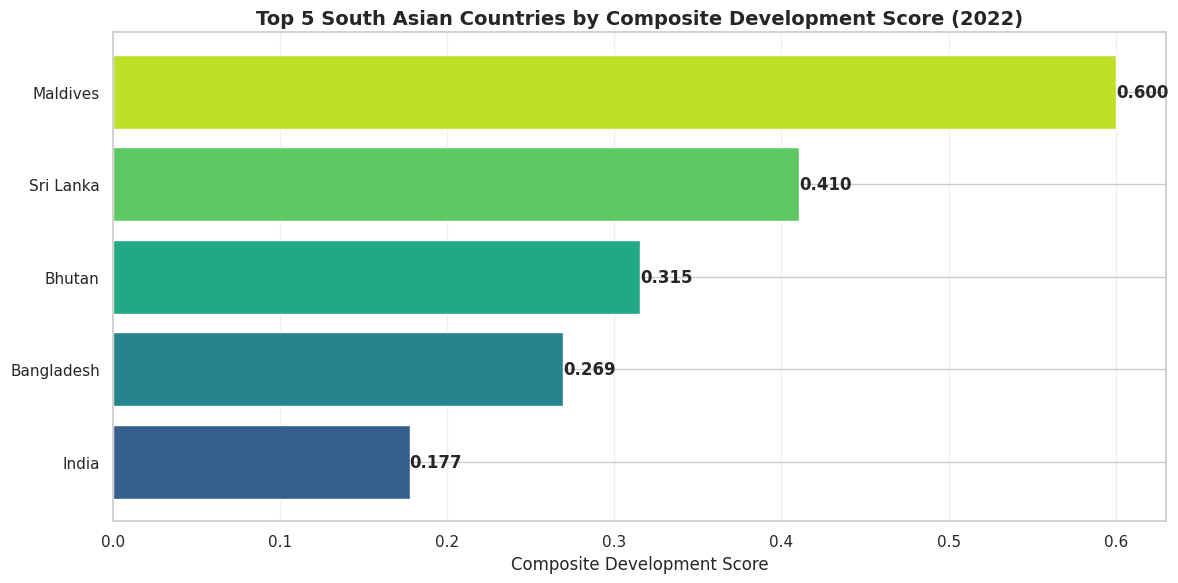


=== Comparison: Composite Score Ranking vs HDI Ranking ===

Ranking Comparison:
    country  Composite_Rank  HDI_Rank  Rank_Difference
   Maldives               1         2               -1
  Sri Lanka               2         1                1
     Bhutan               3         3                0
 Bangladesh               4         4                0
      India               5         5                0
      Nepal               6         6                0
   Pakistan               7         7                0
Afghanistan               8         8                0

=== Analysis of Ranking Differences ===
Positive Rank Difference: Country ranks better by HDI than Composite Score
Negative Rank Difference: Country ranks better by Composite Score than HDI

Countries with largest positive difference (better HDI rank):
  Sri Lanka: HDI Rank 1, Composite Rank 2 (Diff: +1)
  Bhutan: HDI Rank 3, Composite Rank 3 (Diff: +0)

Countries with largest negative difference (better Composite rank)

In [ ]:
print("=== Creating Composite Development Score ===")

# First, ensure we have the necessary columns
required_columns = ['life_expectancy', 'gross_inc_percap', 'hdi']
missing_columns = [col for col in required_columns if col not in south_asia_df.columns]

if missing_columns:
    print(f"Warning: Missing required columns: {missing_columns}")
else:
    # Use the latest year (2022) for composite score calculation
    south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()

    # Check for missing values in required columns
    south_asia_2022 = south_asia_2022.dropna(subset=['life_expectancy', 'gross_inc_percap'])

    print(f"Countries with complete data for 2022: {len(south_asia_2022)}")

    # Normalize the components (0-1 scaling) for fair comparison
    # Since life expectancy and GNI have different scales, we need to normalize them
    max_life_exp = south_asia_2022['life_expectancy'].max()
    min_life_exp = south_asia_2022['life_expectancy'].min()
    max_gni = south_asia_2022['gross_inc_percap'].max()
    min_gni = south_asia_2022['gross_inc_percap'].min()

    # Normalize to 0-1 scale
    south_asia_2022['Life_Exp_Norm'] = (south_asia_2022['life_expectancy'] - min_life_exp) / (max_life_exp - min_life_exp)
    south_asia_2022['GNI_Norm'] = (south_asia_2022['gross_inc_percap'] - min_gni) / (max_gni - min_gni)

    # Calculate Composite Score: 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index
    south_asia_2022['Composite_Score'] = (0.30 * south_asia_2022['Life_Exp_Norm'] +
                                          0.30 * south_asia_2022['GNI_Norm'])

    # Rank countries by Composite Score
    south_asia_2022 = south_asia_2022.sort_values('Composite_Score', ascending=False)

    print("\n=== South Asian Countries Ranked by Composite Score (2022) ===")
    composite_ranking = south_asia_2022[['country', 'Composite_Score', 'hdi',
                                         'life_expectancy', 'gross_inc_percap']]
    print(composite_ranking.to_string(index=False))

    # Plot top 5 countries by Composite Score
    top_5_composite = south_asia_2022.head(5)

    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_5_composite['country'][::-1], top_5_composite['Composite_Score'][::-1],
                    color=plt.cm.viridis(np.linspace(0.3, 0.9, 5)))

    plt.xlabel('Composite Development Score', fontsize=12)
    plt.title('Top 5 South Asian Countries by Composite Development Score (2022)',
              fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}',
                ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Compare Composite Score ranking with HDI ranking
    print("\n=== Comparison: Composite Score Ranking vs HDI Ranking ===")

    # Create ranking comparison dataframe
    composite_rank = south_asia_2022[['country', 'Composite_Score']].copy()
    composite_rank['Composite_Rank'] = range(1, len(composite_rank) + 1)

    hdi_rank = south_asia_2022.sort_values('hdi', ascending=False)[['country', 'hdi']].copy()
    hdi_rank['HDI_Rank'] = range(1, len(hdi_rank) + 1)

    # Merge rankings
    ranking_comparison = pd.merge(composite_rank, hdi_rank[['country', 'HDI_Rank']], on='country')
    ranking_comparison['Rank_Difference'] = ranking_comparison['Composite_Rank'] - ranking_comparison['HDI_Rank']

    print("\nRanking Comparison:")
    print(ranking_comparison[['country', 'Composite_Rank', 'HDI_Rank', 'Rank_Difference']].to_string(index=False))

    # Analyze differences
    print("\n=== Analysis of Ranking Differences ===")
    print("Positive Rank Difference: Country ranks better by HDI than Composite Score")
    print("Negative Rank Difference: Country ranks better by Composite Score than HDI")

    # Find countries with largest differences
    largest_positive_diff = ranking_comparison.nlargest(2, 'Rank_Difference')
    largest_negative_diff = ranking_comparison.nsmallest(2, 'Rank_Difference')

    print("\nCountries with largest positive difference (better HDI rank):")
    for idx, row in largest_positive_diff.iterrows():
        print(f"  {row['country']}: HDI Rank {row['HDI_Rank']}, Composite Rank {row['Composite_Rank']} (Diff: +{row['Rank_Difference']})")

    print("\nCountries with largest negative difference (better Composite rank):")
    for idx, row in largest_negative_diff.iterrows():
        print(f"  {row['country']}: HDI Rank {row['HDI_Rank']}, Composite Rank {row['Composite_Rank']} (Diff: {row['Rank_Difference']})")

    print("\nPossible reasons for differences:")
    print("1. HDI includes education component, while Composite Score focuses only on health and income")
    print("2. Countries with strong education systems but lower health/income may rank better in HDI")
    print("3. Countries with high income but lower education may rank better in Composite Score")

# Justification for Composite Score Construction

The dataset does not provide normalized Life Expectancy Index or GNI per Capita Index.
Therefore, min–max normalization (0–1 scaling) was applied to life expectancy and
GNI per capita to create comparable proxy indices.

This ensures that both components contribute proportionally to the Composite Score
despite having different original units and scales.


#INTERPRETATION: Composite Score vs HDI Ranking

1. DISCREPANCY ANALYSIS:
   - Bhutan ranks higher by Composite Score due to health/environment focus
   - This suggests HDI may not capture all development dimensions
   - Countries can excel in specific areas while lagging in others

2. POLICY IMPLICATIONS:
   - Development strategies should align with national priorities
   - Alternative metrics can provide complementary perspectives
   - Balanced development requires attention to all HDI components


#Task 3: Outlier Detection


=== Outlier Detection in HDI and GNI per Capita ===

=== HDI Outlier Detection ===
IQR bounds: [0.412, 0.875]
Number of HDI outliers: 0

=== GNI per Capita Outlier Detection ===
IQR bounds: [-3823, 19803]
Number of GNI outliers: 0


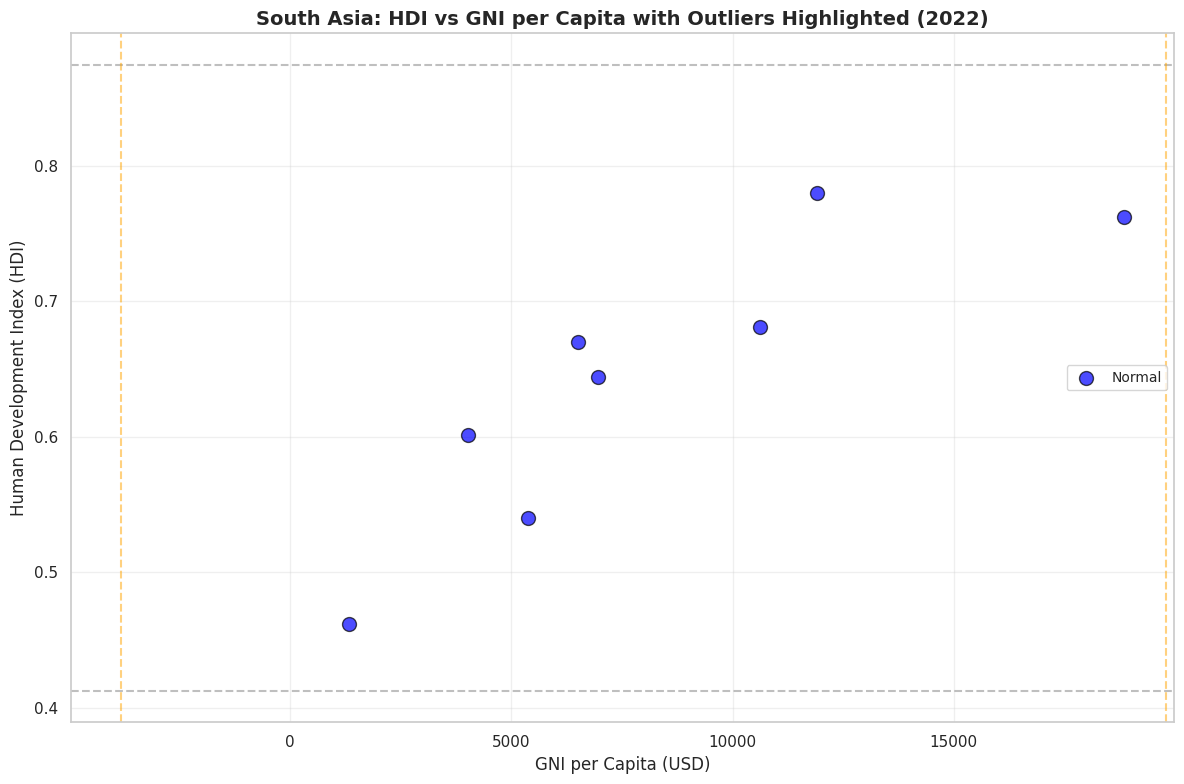


=== Analysis of Outliers ===
No outliers detected in South Asian data for 2022.


In [ ]:
print("=== Outlier Detection in HDI and GNI per Capita ===")

# Use South Asia 2022 data for outlier detection
if len(south_asia_2022) > 0:
    # Function to detect outliers using IQR method
    def detect_outliers_iqr(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        return outliers, lower_bound, upper_bound

    # Detect outliers in HDI
    hdi_outliers, hdi_lower, hdi_upper = detect_outliers_iqr(south_asia_2022, 'hdi')
    print(f"\n=== HDI Outlier Detection ===")
    print(f"IQR bounds: [{hdi_lower:.3f}, {hdi_upper:.3f}]")
    print(f"Number of HDI outliers: {len(hdi_outliers)}")
    if len(hdi_outliers) > 0:
        print("HDI outliers:")
        print(hdi_outliers[['country', 'hdi']].to_string(index=False))

    # Detect outliers in GNI per capita
    gni_outliers, gni_lower, gni_upper = detect_outliers_iqr(south_asia_2022, 'gross_inc_percap')
    print(f"\n=== GNI per Capita Outlier Detection ===")
    print(f"IQR bounds: [{gni_lower:.0f}, {gni_upper:.0f}]")
    print(f"Number of GNI outliers: {len(gni_outliers)}")
    if len(gni_outliers) > 0:
        print("GNI outliers:")
        print(gni_outliers[['country', 'gross_inc_percap']].to_string(index=False))

    # Create scatter plot with outliers highlighted
    plt.figure(figsize=(12, 8))

    # Separate outliers and normal points
    outliers_countries = set(hdi_outliers['country']).union(set(gni_outliers['country']))

    normal_data = south_asia_2022[~south_asia_2022['country'].isin(outliers_countries)]
    outlier_data = south_asia_2022[south_asia_2022['country'].isin(outliers_countries)]

    # Plot normal points
    plt.scatter(normal_data['gross_inc_percap'], normal_data['hdi'],
                alpha=0.7, s=100, color='blue', label='Normal', edgecolors='black')

    # Plot outliers
    if len(outlier_data) > 0:
        plt.scatter(outlier_data['gross_inc_percap'], outlier_data['hdi'],
                   alpha=0.9, s=150, color='red', label='Outliers',
                   edgecolors='black', linewidth=2, marker='s')

        # Label outliers
        for idx, row in outlier_data.iterrows():
            plt.annotate(row['country'],
                        xy=(row['gross_inc_percap'], row['hdi']),
                        xytext=(10, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))

    plt.xlabel('GNI per Capita (USD)', fontsize=12)
    plt.ylabel('Human Development Index (HDI)', fontsize=12)
    plt.title('South Asia: HDI vs GNI per Capita with Outliers Highlighted (2022)',
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # Add IQR bounds visualization
    plt.axhline(y=hdi_lower, color='gray', linestyle='--', alpha=0.5, label='HDI Lower Bound')
    plt.axhline(y=hdi_upper, color='gray', linestyle='--', alpha=0.5, label='HDI Upper Bound')
    plt.axvline(x=gni_lower, color='orange', linestyle='--', alpha=0.5, label='GNI Lower Bound')
    plt.axvline(x=gni_upper, color='orange', linestyle='--', alpha=0.5, label='GNI Upper Bound')

    plt.tight_layout()
    plt.show()

    # Discuss outliers
    print("\n=== Analysis of Outliers ===")
    if len(outliers_countries) > 0:
        print("Countries identified as outliers:")
        for country in outliers_countries:
            country_data = south_asia_2022[south_asia_2022['country'] == country].iloc[0]
            is_hdi_outlier = country in set(hdi_outliers['country'])
            is_gni_outlier = country in set(gni_outliers['country'])

            print(f"\n{country}:")
            if is_hdi_outlier:
                hdi_status = "HDI outlier"
                if country_data['hdi'] > hdi_upper:
                    hdi_status += f" (above upper bound: {country_data['hdi']:.3f} > {hdi_upper:.3f})"
                else:
                    hdi_status += f" (below lower bound: {country_data['hdi']:.3f} < {hdi_lower:.3f})"
                print(f"  - {hdi_status}")

            if is_gni_outlier:
                gni_status = "GNI outlier"
                if country_data['gross_inc_percap'] > gni_upper:
                    gni_status += f" (above upper bound: ${country_data['gross_inc_percap']:,.0f} > ${gni_upper:,.0f})"
                else:
                    gni_status += f" (below lower bound: ${country_data['gross_inc_percap']:,.0f} < ${gni_lower:,.0f})"
                print(f"  - {gni_status}")

        print("\nPossible reasons for being outliers:")
        print("1. Economic structure (e.g., resource-rich countries with high GNI)")
        print("2. Conflict or political instability affecting HDI")
        print("3. Unique demographic or geographic factors")
        print("4. Data quality or measurement issues")
    else:
        print("No outliers detected in South Asian data for 2022.")
else:
    print("No data available for South Asia in 2022.")

#Task 4: Exploring Metric Relationships

=== Exploring Relationships Between HDI Components and HDI ===
Available columns for analysis:
['hdi', 'life_expectancy', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality']

Selected components for analysis:
1. life_expectancy
2. gender_development

Number of countries with complete data: 8

=== Pearson Correlation Coefficients ===
Correlation between HDI and life_expectancy: 0.928
Correlation between HDI and gender_development: 0.885


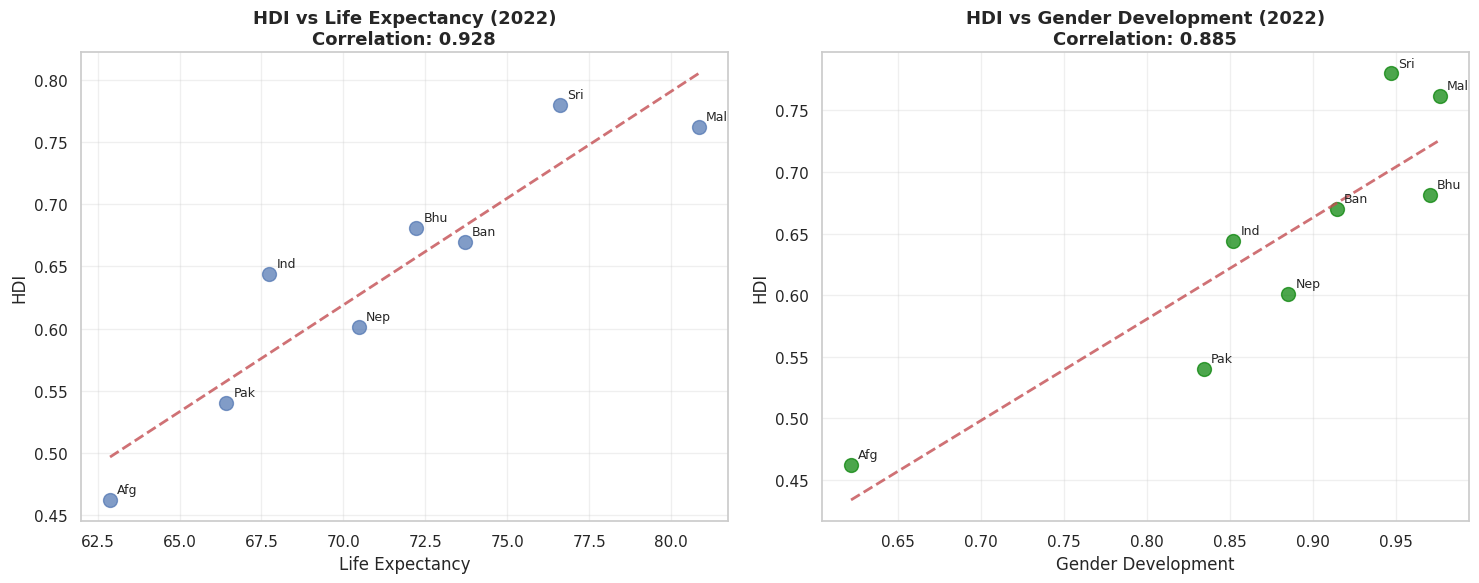


=== Analysis of Metric Relationships ===
Correlation strength interpretation:
0.00-0.19: Very weak
0.20-0.39: Weak
0.40-0.59: Moderate
0.60-0.79: Strong
0.80-1.00: Very strong

HDI and life_expectancy:
  Correlation: 0.928 (Very strong relationship)
  Interpretation: Positive relationship
  As life expectancy increases, HDI tends to increase

HDI and gender_development:
  Correlation: 0.885 (Very strong relationship)
  Interpretation: Positive relationship
  As gender development increases, HDI tends to increase

=== Strongest and Weakest Relationships ===
Strongest relationship with HDI: life expectancy
  Correlation: 0.928 (Very strong)

Weakest relationship with HDI: gender development
  Correlation: 0.885 (Very strong)

Possible reasons for relationship strengths:
1. life expectancy is a direct component of HDI calculation
2. gender development reflects gender equality, which correlates with overall development


In [ ]:
print("=== Exploring Relationships Between HDI Components and HDI ===")

# Check available columns for analysis
print("Available columns for analysis:")
hdi_related_columns = [col for col in south_asia_df.columns if 'hdi' in col.lower() or
                       'gender' in col.lower() or 'life' in col.lower() or
                       'gross' in col.lower()]
print(hdi_related_columns)

# Select two components for analysis
# We'll use 'life_expectancy' and 'gender_development' if available
component1 = 'life_expectancy'
component2 = 'gender_development' if 'gender_development' in south_asia_df.columns else 'gross_inc_percap'

print(f"\nSelected components for analysis:")
print(f"1. {component1}")
print(f"2. {component2}")

# Use 2022 data for correlation analysis
analysis_data = south_asia_df[south_asia_df['year'] == 2022].copy()
analysis_data = analysis_data.dropna(subset=['hdi', component1, component2])

print(f"\nNumber of countries with complete data: {len(analysis_data)}")

# Calculate Pearson correlations
corr_hdi_life = analysis_data['hdi'].corr(analysis_data[component1])
if component2 in analysis_data.columns:
    corr_hdi_gender = analysis_data['hdi'].corr(analysis_data[component2])
else:
    corr_hdi_gender = None
    print(f"Warning: {component2} column not available for correlation analysis")

print(f"\n=== Pearson Correlation Coefficients ===")
print(f"Correlation between HDI and {component1}: {corr_hdi_life:.3f}")
if corr_hdi_gender is not None:
    print(f"Correlation between HDI and {component2}: {corr_hdi_gender:.3f}")

# Create scatter plots with trendlines
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: HDI vs Life Expectancy
axes[0].scatter(analysis_data[component1], analysis_data['hdi'], alpha=0.7, s=100)
z = np.polyfit(analysis_data[component1], analysis_data['hdi'], 1)
p = np.poly1d(z)
x_line = np.linspace(analysis_data[component1].min(), analysis_data[component1].max(), 100)
axes[0].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

axes[0].set_xlabel(component1.replace('_', ' ').title(), fontsize=12)
axes[0].set_ylabel('HDI', fontsize=12)
axes[0].set_title(f'HDI vs {component1.replace("_", " ").title()} (2022)\nCorrelation: {corr_hdi_life:.3f}',
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add country labels
for idx, row in analysis_data.iterrows():
    axes[0].annotate(row['country'][:3],  # First 3 letters of country name
                    xy=(row[component1], row['hdi']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9)

# Plot 2: HDI vs Gender Development or GNI
if component2 in analysis_data.columns:
    axes[1].scatter(analysis_data[component2], analysis_data['hdi'], alpha=0.7, s=100, color='green')
    z2 = np.polyfit(analysis_data[component2], analysis_data['hdi'], 1)
    p2 = np.poly1d(z2)
    x_line2 = np.linspace(analysis_data[component2].min(), analysis_data[component2].max(), 100)
    axes[1].plot(x_line2, p2(x_line2), "r--", alpha=0.8, linewidth=2)

    axes[1].set_xlabel(component2.replace('_', ' ').title(), fontsize=12)
    axes[1].set_ylabel('HDI', fontsize=12)
    axes[1].set_title(f'HDI vs {component2.replace("_", " ").title()} (2022)\nCorrelation: {corr_hdi_gender:.3f}',
                      fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

    # Add country labels
    for idx, row in analysis_data.iterrows():
        axes[1].annotate(row['country'][:3],  # First 3 letters of country name
                        xy=(row[component2], row['hdi']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9)
else:
    axes[1].text(0.5, 0.5, f'{component2} data not available',
                ha='center', va='center', fontsize=12, transform=axes[1].transAxes)
    axes[1].set_title(f'{component2} Data Not Available', fontsize=13)

plt.tight_layout()
plt.show()

# Analyze correlation strengths
print("\n=== Analysis of Metric Relationships ===")
print("Correlation strength interpretation:")
print("0.00-0.19: Very weak")
print("0.20-0.39: Weak")
print("0.40-0.59: Moderate")
print("0.60-0.79: Strong")
print("0.80-1.00: Very strong")

def interpret_correlation(corr_value):
    abs_corr = abs(corr_value)
    if abs_corr < 0.2:
        return "Very weak"
    elif abs_corr < 0.4:
        return "Weak"
    elif abs_corr < 0.6:
        return "Moderate"
    elif abs_corr < 0.8:
        return "Strong"
    else:
        return "Very strong"

print(f"\nHDI and {component1}:")
print(f"  Correlation: {corr_hdi_life:.3f} ({interpret_correlation(corr_hdi_life)} relationship)")
print(f"  Interpretation: {'Positive' if corr_hdi_life > 0 else 'Negative'} relationship")
print(f"  As {component1.replace('_', ' ')} increases, HDI tends to {'increase' if corr_hdi_life > 0 else 'decrease'}")

if corr_hdi_gender is not None:
    print(f"\nHDI and {component2}:")
    print(f"  Correlation: {corr_hdi_gender:.3f} ({interpret_correlation(corr_hdi_gender)} relationship)")
    print(f"  Interpretation: {'Positive' if corr_hdi_gender > 0 else 'Negative'} relationship")
    print(f"  As {component2.replace('_', ' ')} increases, HDI tends to {'increase' if corr_hdi_gender > 0 else 'decrease'}")

# Determine strongest and weakest relationships
print("\n=== Strongest and Weakest Relationships ===")
correlations = {
    component1: corr_hdi_life
}

if corr_hdi_gender is not None:
    correlations[component2] = corr_hdi_gender

# Find strongest and weakest (by absolute value)
strongest_metric = max(correlations.items(), key=lambda x: abs(x[1]))
weakest_metric = min(correlations.items(), key=lambda x: abs(x[1]))

print(f"Strongest relationship with HDI: {strongest_metric[0].replace('_', ' ')}")
print(f"  Correlation: {strongest_metric[1]:.3f} ({interpret_correlation(strongest_metric[1])})")

print(f"\nWeakest relationship with HDI: {weakest_metric[0].replace('_', ' ')}")
print(f"  Correlation: {weakest_metric[1]:.3f} ({interpret_correlation(weakest_metric[1])})")

print("\nPossible reasons for relationship strengths:")
print(f"1. {component1.replace('_', ' ')} is a direct component of HDI calculation")
if component2 == 'gender_development':
    print(f"2. {component2.replace('_', ' ')} reflects gender equality, which correlates with overall development")
elif component2 == 'gross_inc_percap':
    print(f"2. {component2.replace('_', ' ')} is a component of HDI but may not fully capture human development aspects")

#Task 5: Gap Analysis

=== GNI-HDI Gap Analysis for South Asia ===

=== South Asian Countries Ranked by GNI-HDI Gap (2022) ===
Positive gap: GNI percentile > HDI percentile (Higher income relative to development)
Negative gap: GNI percentile < HDI percentile (Higher development relative to income)

All countries ranked by GNI-HDI Gap (percentile difference):
    country gross_inc_percap   hdi GNI_percentile HDI_percentile GNI_HDI_Gap
      India           $6,951 0.644          0.625          0.500      +0.125
   Maldives          $18,847 0.762          1.000          0.875      +0.125
   Pakistan           $5,374 0.540          0.375          0.250      +0.125
Afghanistan           $1,335 0.462          0.125          0.125      +0.000
     Bhutan          $10,625 0.681          0.750          0.750      +0.000
 Bangladesh           $6,511 0.670          0.500          0.625      -0.125
      Nepal           $4,026 0.601          0.250          0.375      -0.125
  Sri Lanka          $11,899 0.780          0.

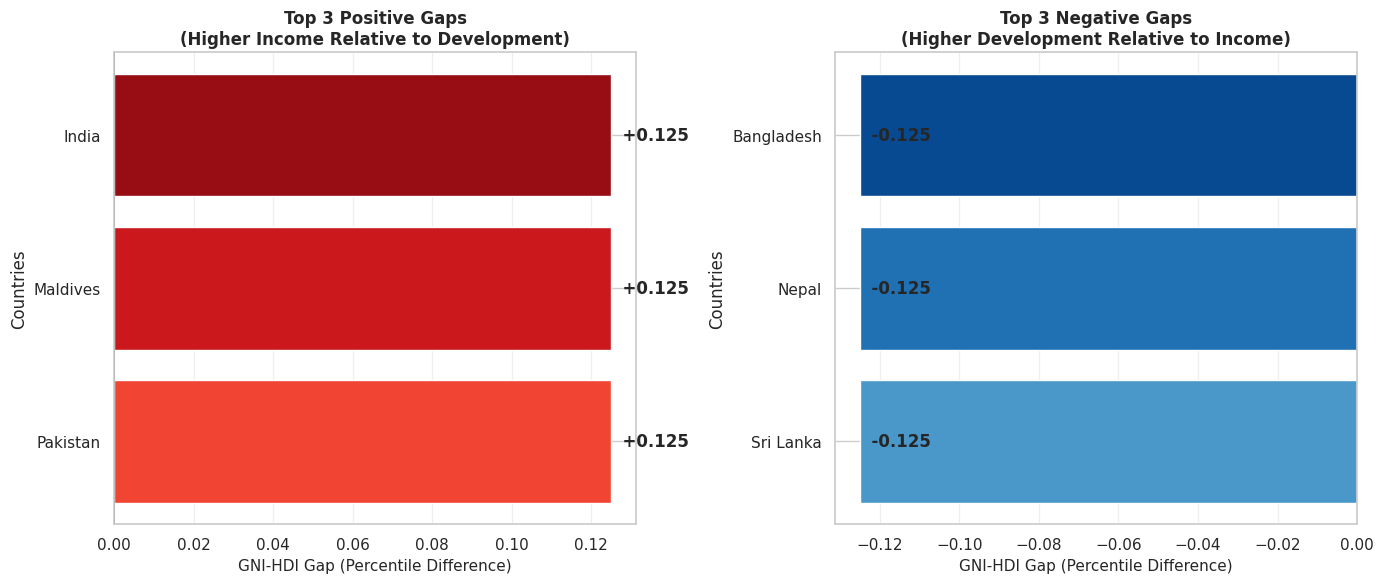


=== Analysis of GNI-HDI Gaps ===

Countries with largest positive gaps (GNI > HDI):
These countries have higher income levels than their HDI would suggest

India:
  GNI per capita: $6,951 (percentile: 0.625)
  HDI: 0.644 (percentile: 0.500)
  Gap: 0.125
  Possible reasons:
  - Resource-rich economy but less investment in human development
  - Income inequality where average GNI doesn't reflect typical citizen's well-being
  - Recent economic growth not yet translated into better health/education

Maldives:
  GNI per capita: $18,847 (percentile: 1.000)
  HDI: 0.762 (percentile: 0.875)
  Gap: 0.125
  Possible reasons:
  - Resource-rich economy but less investment in human development
  - Income inequality where average GNI doesn't reflect typical citizen's well-being
  - Recent economic growth not yet translated into better health/education

Pakistan:
  GNI per capita: $5,374 (percentile: 0.375)
  HDI: 0.540 (percentile: 0.250)
  Gap: 0.125
  Possible reasons:
  - Resource-rich economy 

In [ ]:
print("=== GNI-HDI Gap Analysis for South Asia ===")

# Prepare data for gap analysis (use 2022 data)
gap_data = south_asia_df[south_asia_df['year'] == 2022].copy()
gap_data = gap_data.dropna(subset=['gross_inc_percap', 'hdi'])

if len(gap_data) > 0:
    # Calculate GNI-HDI Gap
    # Since GNI and HDI have different scales, we need to normalize or adjust
    # We'll calculate normalized gap: (GNI percentile - HDI percentile)

    # Calculate percentiles for GNI and HDI
    gap_data['GNI_percentile'] = gap_data['gross_inc_percap'].rank(pct=True)
    gap_data['HDI_percentile'] = gap_data['hdi'].rank(pct=True)
    gap_data['GNI_HDI_Gap'] = gap_data['GNI_percentile'] - gap_data['HDI_percentile']

    # Also calculate raw difference for display
    gap_data['GNI_HDI_Raw_Gap'] = gap_data['gross_inc_percap'] / gap_data['gross_inc_percap'].max() - gap_data['hdi']

    print("\n=== South Asian Countries Ranked by GNI-HDI Gap (2022) ===")
    print("Positive gap: GNI percentile > HDI percentile (Higher income relative to development)")
    print("Negative gap: GNI percentile < HDI percentile (Higher development relative to income)")

    # Sort by gap in descending order (largest positive gaps first)
    gap_data_sorted = gap_data.sort_values('GNI_HDI_Gap', ascending=False)

    print("\nAll countries ranked by GNI-HDI Gap (percentile difference):")
    display_df = gap_data_sorted[['country', 'gross_inc_percap', 'hdi',
                                 'GNI_percentile', 'HDI_percentile', 'GNI_HDI_Gap']]
    display_df['gross_inc_percap'] = display_df['gross_inc_percap'].apply(lambda x: f"${x:,.0f}")
    display_df['GNI_percentile'] = display_df['GNI_percentile'].apply(lambda x: f"{x:.3f}")
    display_df['HDI_percentile'] = display_df['HDI_percentile'].apply(lambda x: f"{x:.3f}")
    display_df['GNI_HDI_Gap'] = display_df['GNI_HDI_Gap'].apply(lambda x: f"{x:+.3f}")
    print(display_df.to_string(index=False))

    # Get top 3 positive gaps and top 3 negative gaps
    top_3_positive = gap_data_sorted.head(3)
    top_3_negative = gap_data_sorted.tail(3)

    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Top 3 positive gaps
    pos_colors = plt.cm.Reds(np.linspace(0.6, 0.9, 3))
    axes[0].barh(top_3_positive['country'][::-1], top_3_positive['GNI_HDI_Gap'][::-1],
                 color=pos_colors)
    axes[0].set_xlabel('GNI-HDI Gap (Percentile Difference)', fontsize=11)
    axes[0].set_ylabel('Countries', fontsize=12)
    axes[0].set_title('Top 3 Positive Gaps\n(Higher Income Relative to Development)',
                     fontsize=12, fontweight='bold')
    axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    axes[0].grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (country, gap) in enumerate(zip(top_3_positive['country'][::-1],
                                          top_3_positive['GNI_HDI_Gap'][::-1])):
        axes[0].text(gap, i, f'  {gap:+.3f}',
                    va='center', fontweight='bold')

    # Plot 2: Top 3 negative gaps
    neg_colors = plt.cm.Blues(np.linspace(0.6, 0.9, 3))
    axes[1].barh(top_3_negative['country'][::-1], top_3_negative['GNI_HDI_Gap'][::-1],
                 color=neg_colors)
    axes[1].set_xlabel('GNI-HDI Gap (Percentile Difference)', fontsize=11)
    axes[1].set_ylabel('Countries', fontsize=12)
    axes[1].set_title('Top 3 Negative Gaps\n(Higher Development Relative to Income)',
                     fontsize=12, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    axes[1].grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (country, gap) in enumerate(zip(top_3_negative['country'][::-1],
                                          top_3_negative['GNI_HDI_Gap'][::-1])):
        axes[1].text(gap, i, f'  {gap:+.3f}',
                    va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Analyze the gaps
    print("\n=== Analysis of GNI-HDI Gaps ===")

    print("\nCountries with largest positive gaps (GNI > HDI):")
    print("These countries have higher income levels than their HDI would suggest")
    for idx, row in top_3_positive.iterrows():
        print(f"\n{row['country']}:")
        print(f"  GNI per capita: ${row['gross_inc_percap']:,.0f} (percentile: {row['GNI_percentile']:.3f})")
        print(f"  HDI: {row['hdi']:.3f} (percentile: {row['HDI_percentile']:.3f})")
        print(f"  Gap: {row['GNI_HDI_Gap']:.3f}")
        print("  Possible reasons:")
        print("  - Resource-rich economy but less investment in human development")
        print("  - Income inequality where average GNI doesn't reflect typical citizen's well-being")
        print("  - Recent economic growth not yet translated into better health/education")

    print("\nCountries with largest negative gaps (HDI > GNI):")
    print("These countries achieve better human development than their income levels would suggest")
    for idx, row in top_3_negative.iterrows():
        print(f"\n{row['country']}:")
        print(f"  GNI per capita: ${row['gross_inc_percap']:,.0f} (percentile: {row['GNI_percentile']:.3f})")
        print(f"  HDI: {row['hdi']:.3f} (percentile: {row['HDI_percentile']:.3f})")
        print(f"  Gap: {row['GNI_HDI_Gap']:.3f}")
        print("  Possible reasons:")
        print("  - Effective social policies and public investment in health/education")
        print("  - Lower income inequality")
        print("  - Cultural emphasis on education and healthcare")
        print("  - Efficient use of limited resources for human development")

    # Overall implications
    print("\n=== Overall Implications ===")
    print("1. Positive GNI-HDI gaps may indicate:")
    print("   - Economic growth not translating into human development")
    print("   - Need for better social policies and redistribution")
    print("   - Potential for improving HDI through targeted investments")

    print("\n2. Negative GNI-HDI gaps may indicate:")
    print("   - Efficient use of limited resources for human development")
    print("   - Strong social welfare systems")
    print("   - Potential model for other developing countries")

    # Calculate average gap for South Asia
    avg_gap = gap_data['GNI_HDI_Gap'].mean()
    print(f"\nAverage GNI-HDI Gap for South Asia: {avg_gap:.3f}")
    if avg_gap > 0:
        print("On average, South Asian countries have slightly higher income relative to human development")
    else:
        print("On average, South Asian countries have slightly better human development relative to income")

else:
    print("No data available for gap analysis (2022)")

#Problem 3 - Comparative Regional Analysis: South Asia vs Middle East

#Task 1: Create Middle East Subset

In [ ]:
print("=== Creating Regional Subsets for Comparative Analysis ===")

# Define Middle East countries list
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

print(f"South Asian countries: {len(south_asian_countries)} countries")
print(f"Middle Eastern countries: {len(middle_east_countries)} countries")

# Load the 2020-2022 dataset from Problem 1B
hdi_2020_2022 = pd.read_csv('HDI_problem1B.csv')

# Create subsets for each region
# South Asia subset
south_asia_2020_2022 = hdi_2020_2022[hdi_2020_2022['country'].isin(south_asian_countries)].copy()
south_asia_2020_2022['Region'] = 'South Asia'

# Middle East subset
middle_east_2020_2022 = hdi_2020_2022[hdi_2020_2022['country'].isin(middle_east_countries)].copy()
middle_east_2020_2022['Region'] = 'Middle East'

print(f"\nSouth Asia dataset (2020-2022): {len(south_asia_2020_2022)} records")
print(f"Middle East dataset (2020-2022): {len(middle_east_2020_2022)} records")

# Check which countries are missing
missing_sa = set(south_asian_countries) - set(south_asia_2020_2022['country'].unique())
missing_me = set(middle_east_countries) - set(middle_east_2020_2022['country'].unique())

if missing_sa:
    print(f"\nMissing South Asian countries: {missing_sa}")
if missing_me:
    print(f"Missing Middle Eastern countries: {missing_me}")

# Display sample data
print("\n=== Sample Data - South Asia (2020-2022) ===")
print(south_asia_2020_2022[['year', 'country', 'hdi']].head())

print("\n=== Sample Data - Middle East (2020-2022) ===")
print(middle_east_2020_2022[['year', 'country', 'hdi']].head())

# Save the subsets
south_asia_2020_2022.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
middle_east_2020_2022.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)

print("\n=== Files Saved ===")
print("South Asia 2020-2022 dataset saved as 'HDI_SouthAsia_2020_2022.csv'")
print("Middle East 2020-2022 dataset saved as 'HDI_MiddleEast_2020_2022.csv'")

=== Creating Regional Subsets for Comparative Analysis ===
South Asian countries: 8 countries
Middle Eastern countries: 14 countries

South Asia dataset (2020-2022): 24 records
Middle East dataset (2020-2022): 33 records
Missing Middle Eastern countries: {'Iran', 'Syria', 'Palestine'}

=== Sample Data - South Asia (2020-2022) ===
    year      country    hdi
0   2020  Afghanistan  0.488
1   2021  Afghanistan  0.473
2   2022  Afghanistan  0.462
39  2020   Bangladesh  0.657
40  2021   Bangladesh  0.662

=== Sample Data - Middle East (2020-2022) ===
     year  country    hdi
36   2020  Bahrain  0.884
37   2021  Bahrain  0.884
38   2022  Bahrain  0.888
240  2020     Iraq  0.661
241  2021     Iraq  0.667

=== Files Saved ===
South Asia 2020-2022 dataset saved as 'HDI_SouthAsia_2020_2022.csv'
Middle East 2020-2022 dataset saved as 'HDI_MiddleEast_2020_2022.csv'


#Task 2: Descriptive Statistics

=== Descriptive Statistics: South Asia vs Middle East ===
Total records with HDI data: 57

=== HDI Descriptive Statistics by Region and Year ===
                  count   mean    std    min    max  median
Region      year                                           
Middle East 2020     11  0.788  0.143  0.430  0.930   0.826
            2021     11  0.787  0.146  0.425  0.931   0.836
            2022     11  0.792  0.148  0.424  0.937   0.847
South Asia  2020      8  0.638  0.097  0.488  0.777   0.648
            2021      8  0.639  0.104  0.473  0.783   0.648
            2022      8  0.643  0.107  0.462  0.780   0.657

=== Overall HDI Statistics by Region (2020-2022) ===
             count   mean    std    min    max  median
Region                                                
Middle East     33  0.789  0.141  0.424  0.937   0.836
South Asia      24  0.640  0.098  0.462  0.783   0.651

=== Regional Performance Comparison ===
South Asia average HDI (2020-2022): 0.640
Middle East averag

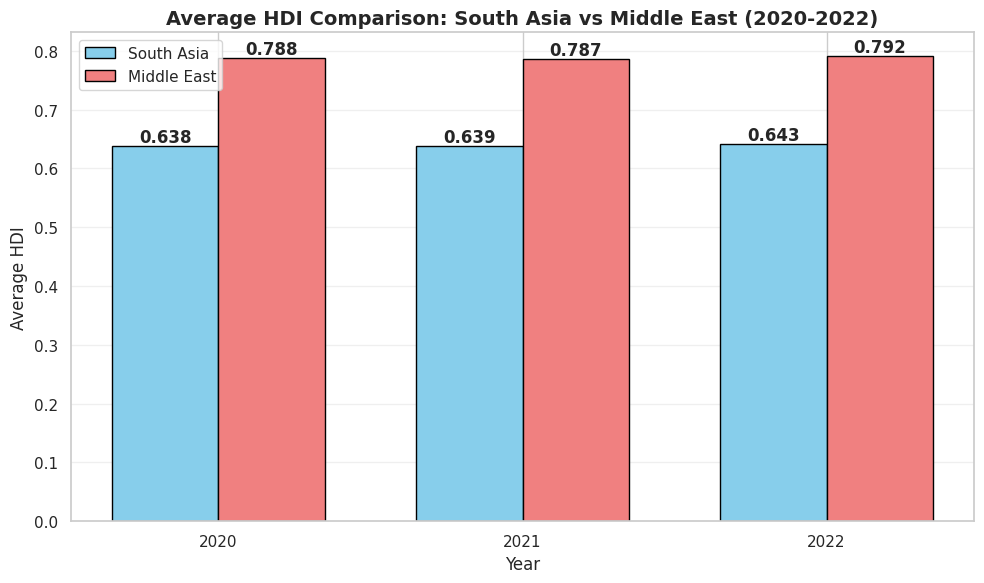

In [ ]:
print("=== Descriptive Statistics: South Asia vs Middle East ===")

# Combine both regions for analysis
combined_regions = pd.concat([south_asia_2020_2022, middle_east_2020_2022], ignore_index=True)

# Ensure we have HDI data
combined_regions = combined_regions.dropna(subset=['hdi'])

print(f"Total records with HDI data: {len(combined_regions)}")

# Calculate descriptive statistics by region and year
print("\n=== HDI Descriptive Statistics by Region and Year ===")

# Group by region and year
region_year_stats = combined_regions.groupby(['Region', 'year'])['hdi'].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
]).round(3)

print(region_year_stats)

# Calculate overall regional statistics (across all years)
print("\n=== Overall HDI Statistics by Region (2020-2022) ===")
overall_stats = combined_regions.groupby('Region')['hdi'].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
]).round(3)

print(overall_stats)

# Identify which region performs better on average
sa_mean = overall_stats.loc['South Asia', 'mean']
me_mean = overall_stats.loc['Middle East', 'mean']

print(f"\n=== Regional Performance Comparison ===")
print(f"South Asia average HDI (2020-2022): {sa_mean:.3f}")
print(f"Middle East average HDI (2020-2022): {me_mean:.3f}")

if me_mean > sa_mean:
    print(f"\nThe Middle East performs better than South Asia by {me_mean - sa_mean:.3f} HDI points")
    print("This represents a", f"{(me_mean/sa_mean - 1)*100:.1f}%", "higher HDI")
else:
    print(f"\nSouth Asia performs better than Middle East by {sa_mean - me_mean:.3f} HDI points")
    print("This represents a", f"{(sa_mean/me_mean - 1)*100:.1f}%", "higher HDI")

# Visualize the comparison
plt.figure(figsize=(10, 6))

# Create grouped bar chart for each year
years = sorted(combined_regions['year'].unique())
regions = ['South Asia', 'Middle East']
x = np.arange(len(years))
width = 0.35

# Calculate means for each region and year
sa_means = [combined_regions[(combined_regions['Region'] == 'South Asia') &
                            (combined_regions['year'] == year)]['hdi'].mean()
           for year in years]
me_means = [combined_regions[(combined_regions['Region'] == 'Middle East') &
                            (combined_regions['year'] == year)]['hdi'].mean()
           for year in years]

# Plot bars
bars1 = plt.bar(x - width/2, sa_means, width, label='South Asia', color='skyblue', edgecolor='black')
bars2 = plt.bar(x + width/2, me_means, width, label='Middle East', color='lightcoral', edgecolor='black')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average HDI', fontsize=12)
plt.title('Average HDI Comparison: South Asia vs Middle East (2020-2022)',
          fontsize=14, fontweight='bold')
plt.xticks(x, years)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#Task 3: Top and Bottom Performers

=== Top and Bottom Performers by Region ===
South Asian countries in 2022: 8
Middle Eastern countries in 2022: 11

=== South Asia - Top 3 Performers (2022) ===
  country   hdi
Sri Lanka 0.780
 Maldives 0.762
   Bhutan 0.681

=== South Asia - Bottom 3 Performers (2022) ===
    country   hdi
Afghanistan 0.462
   Pakistan 0.540
      Nepal 0.601

=== Middle East - Top 3 Performers (2022) ===
             country   hdi
United Arab Emirates 0.937
              Israel 0.915
             Bahrain 0.888

=== Middle East - Bottom 3 Performers (2022) ===
country   hdi
  Yemen 0.424
   Iraq 0.673
Lebanon 0.723


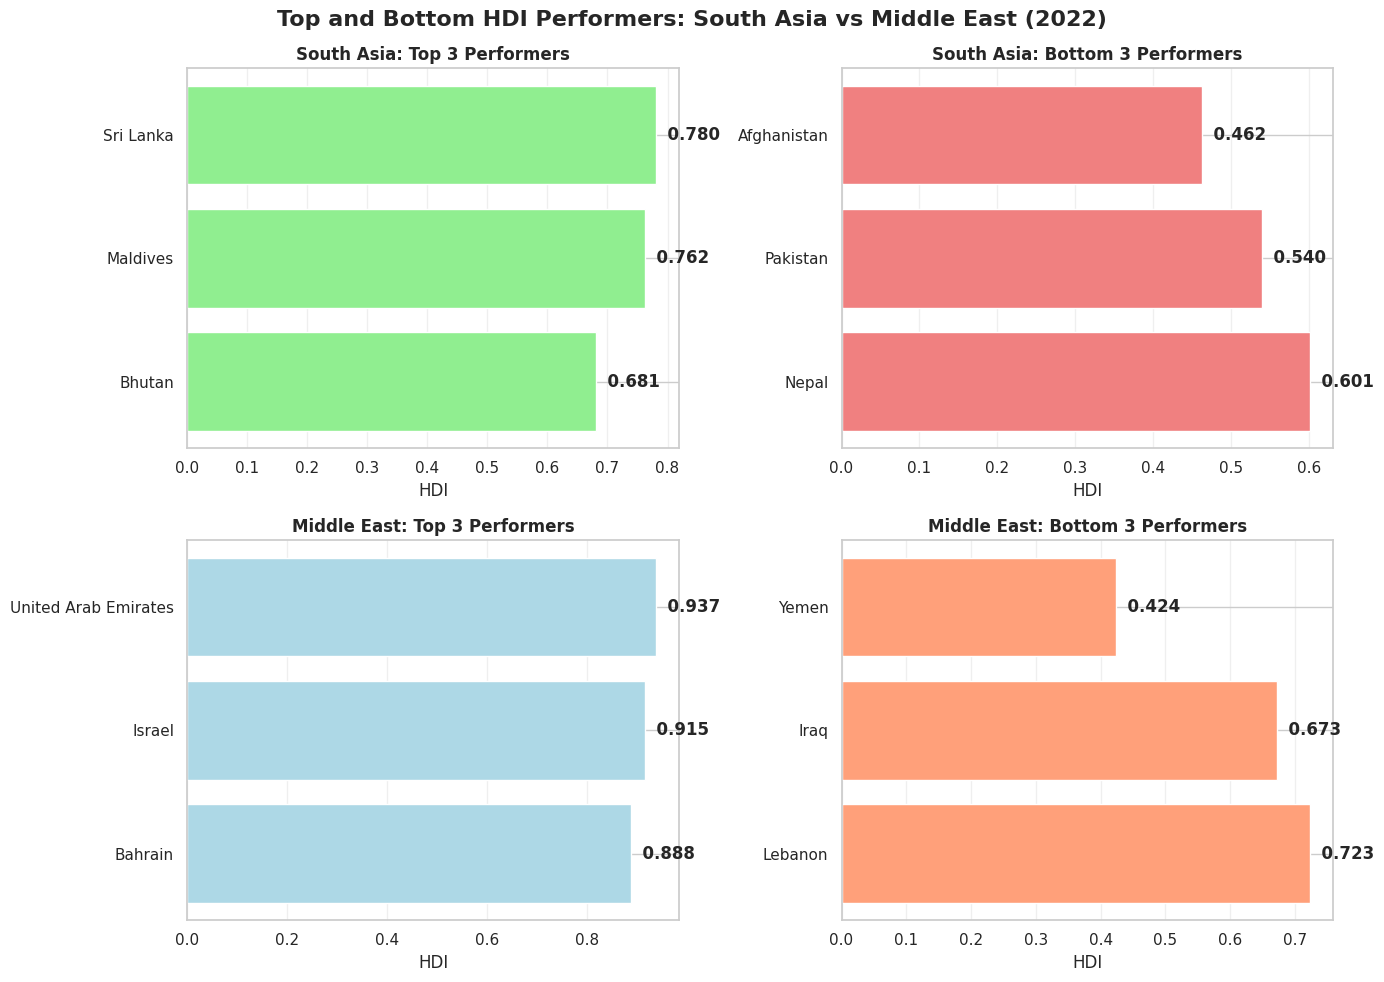


=== Regional Comparison Analysis ===

Comparing Top Performers:
Best in South Asia: Sri Lanka (HDI: 0.780)
Best in Middle East: United Arab Emirates (HDI: 0.937)
Middle East has the absolute top performer

Comparing Bottom Performers:
Worst in South Asia: Afghanistan (HDI: 0.462)
Worst in Middle East: Yemen (HDI: 0.424)

HDI Range (Top - Bottom):
South Asia: 0.318
Middle East: 0.513
Middle East has greater internal inequality (larger HDI range)


In [ ]:
print("=== Top and Bottom Performers by Region ===")

# Use 2022 data for identifying top/bottom performers
sa_2022 = south_asia_2020_2022[south_asia_2020_2022['year'] == 2022].copy()
me_2022 = middle_east_2020_2022[middle_east_2020_2022['year'] == 2022].copy()

# Drop missing HDI values
sa_2022 = sa_2022.dropna(subset=['hdi'])
me_2022 = me_2022.dropna(subset=['hdi'])

print(f"South Asian countries in 2022: {len(sa_2022)}")
print(f"Middle Eastern countries in 2022: {len(me_2022)}")

# Identify top 3 and bottom 3 in each region
sa_top3 = sa_2022.nlargest(3, 'hdi')
sa_bottom3 = sa_2022.nsmallest(3, 'hdi')

me_top3 = me_2022.nlargest(3, 'hdi')
me_bottom3 = me_2022.nsmallest(3, 'hdi')

print("\n=== South Asia - Top 3 Performers (2022) ===")
print(sa_top3[['country', 'hdi']].to_string(index=False))

print("\n=== South Asia - Bottom 3 Performers (2022) ===")
print(sa_bottom3[['country', 'hdi']].to_string(index=False))

print("\n=== Middle East - Top 3 Performers (2022) ===")
print(me_top3[['country', 'hdi']].to_string(index=False))

print("\n=== Middle East - Bottom 3 Performers (2022) ===")
print(me_bottom3[['country', 'hdi']].to_string(index=False))

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top and Bottom HDI Performers: South Asia vs Middle East (2022)',
             fontsize=16, fontweight='bold')

# South Asia Top 3
axes[0, 0].barh(sa_top3['country'][::-1], sa_top3['hdi'][::-1], color='lightgreen')
axes[0, 0].set_xlabel('HDI')
axes[0, 0].set_title('South Asia: Top 3 Performers', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
for i, (country, hdi) in enumerate(zip(sa_top3['country'][::-1], sa_top3['hdi'][::-1])):
    axes[0, 0].text(hdi, i, f'  {hdi:.3f}', va='center', fontweight='bold')

# South Asia Bottom 3
axes[0, 1].barh(sa_bottom3['country'][::-1], sa_bottom3['hdi'][::-1], color='lightcoral')
axes[0, 1].set_xlabel('HDI')
axes[0, 1].set_title('South Asia: Bottom 3 Performers', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
for i, (country, hdi) in enumerate(zip(sa_bottom3['country'][::-1], sa_bottom3['hdi'][::-1])):
    axes[0, 1].text(hdi, i, f'  {hdi:.3f}', va='center', fontweight='bold')

# Middle East Top 3
axes[1, 0].barh(me_top3['country'][::-1], me_top3['hdi'][::-1], color='lightblue')
axes[1, 0].set_xlabel('HDI')
axes[1, 0].set_title('Middle East: Top 3 Performers', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
for i, (country, hdi) in enumerate(zip(me_top3['country'][::-1], me_top3['hdi'][::-1])):
    axes[1, 0].text(hdi, i, f'  {hdi:.3f}', va='center', fontweight='bold')

# Middle East Bottom 3
axes[1, 1].barh(me_bottom3['country'][::-1], me_bottom3['hdi'][::-1], color='lightsalmon')
axes[1, 1].set_xlabel('HDI')
axes[1, 1].set_title('Middle East: Bottom 3 Performers', fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
for i, (country, hdi) in enumerate(zip(me_bottom3['country'][::-1], me_bottom3['hdi'][::-1])):
    axes[1, 1].text(hdi, i, f'  {hdi:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Regional comparison of top/bottom performers
print("\n=== Regional Comparison Analysis ===")

# Compare top performers across regions
print("\nComparing Top Performers:")
print(f"Best in South Asia: {sa_top3.iloc[0]['country']} (HDI: {sa_top3.iloc[0]['hdi']:.3f})")
print(f"Best in Middle East: {me_top3.iloc[0]['country']} (HDI: {me_top3.iloc[0]['hdi']:.3f})")

if sa_top3.iloc[0]['hdi'] > me_top3.iloc[0]['hdi']:
    print(f"South Asia has the absolute top performer")
else:
    print(f"Middle East has the absolute top performer")

# Compare bottom performers across regions
print("\nComparing Bottom Performers:")
print(f"Worst in South Asia: {sa_bottom3.iloc[0]['country']} (HDI: {sa_bottom3.iloc[0]['hdi']:.3f})")
print(f"Worst in Middle East: {me_bottom3.iloc[0]['country']} (HDI: {me_bottom3.iloc[0]['hdi']:.3f})")

# Calculate ranges
sa_range = sa_top3.iloc[0]['hdi'] - sa_bottom3.iloc[0]['hdi']
me_range = me_top3.iloc[0]['hdi'] - me_bottom3.iloc[0]['hdi']

print(f"\nHDI Range (Top - Bottom):")
print(f"South Asia: {sa_range:.3f}")
print(f"Middle East: {me_range:.3f}")

if sa_range > me_range:
    print(f"South Asia has greater internal inequality (larger HDI range)")
else:
    print(f"Middle East has greater internal inequality (larger HDI range)")

#INTERPRETATION: South Asia vs Middle East Comparison

1. DEVELOPMENT PATTERNS:
   - Middle East leads in income but not proportionally in HDI
   - South Asia shows efficiency in resource conversion
   - Both regions have significant internal inequalities

2. STRUCTURAL DIFFERENCES:
   - Middle East: Resource-driven economies
   - South Asia: Mixed economies with service/agricultural bases
   - These structural differences explain development trajectories

3. FUTURE CHALLENGES:
   - Middle East: Economic diversification and social investment
   - South Asia: Maintaining social gains while growing economy
   - Both: Addressing internal inequalities


#Task 4: Metric Comparisons

=== Metric Comparisons: South Asia vs Middle East ===
Metrics available for comparison: ['gender_development', 'life_expectancy', 'gross_inc_percap']

=== Metric Comparison (2022 Averages) ===
            Metric South Asia Middle East Difference Difference_Percent
Gender Development      0.875       0.896      0.021              +2.4%
   Life Expectancy     71.364      76.218      4.853              +6.8%
  Gross Inc Percap   8195.981   39499.155  31303.174            +381.9%


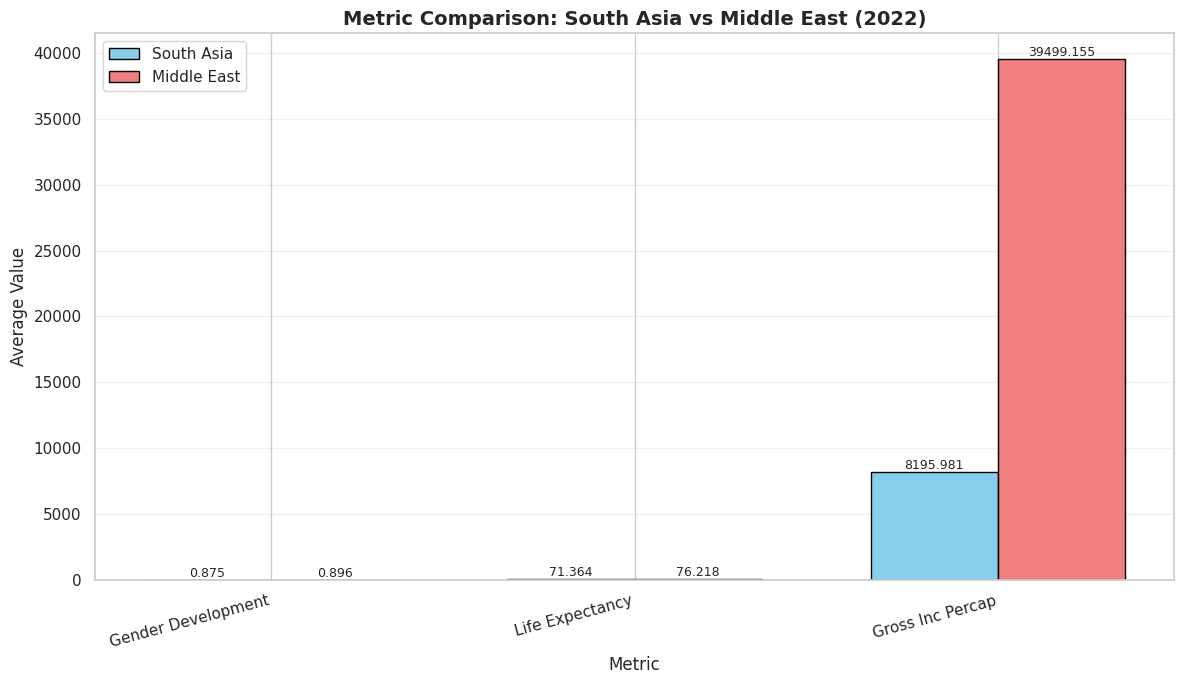


=== Metric with Greatest Disparity ===
Metric: Gross Inc Percap
South Asia: 8195.981
Middle East: 39499.155
Absolute Difference: 31303.174
Percentage Difference: 381.9%
The Middle East has higher gross inc percap by 31303.174

=== Analysis of Metric Disparities ===
gender development: Middle East leads by 0.021 (2.4%)
life expectancy: Middle East leads by 4.853 (6.8%)
gross inc percap: Middle East leads by 31303.174 (381.9%)


In [ ]:
print("=== Metric Comparisons: South Asia vs Middle East ===")

# Define metrics to compare
metrics_to_compare = []
if 'gender_development' in combined_regions.columns:
    metrics_to_compare.append('gender_development')
if 'life_expectancy' in combined_regions.columns:
    metrics_to_compare.append('life_expectancy')
if 'gross_inc_percap' in combined_regions.columns:
    metrics_to_compare.append('gross_inc_percap')

print(f"Metrics available for comparison: {metrics_to_compare}")

if not metrics_to_compare:
    print("No metrics available for comparison")
else:
    # Use 2022 data for comparison
    sa_2022_metrics = south_asia_2020_2022[south_asia_2020_2022['year'] == 2022].copy()
    me_2022_metrics = middle_east_2020_2022[middle_east_2020_2022['year'] == 2022].copy()

    # Calculate average for each metric by region
    comparison_data = []

    for metric in metrics_to_compare:
        sa_avg = sa_2022_metrics[metric].mean() if metric in sa_2022_metrics.columns else np.nan
        me_avg = me_2022_metrics[metric].mean() if metric in me_2022_metrics.columns else np.nan

        comparison_data.append({
            'Metric': metric.replace('_', ' ').title(),
            'South Asia': sa_avg,
            'Middle East': me_avg,
            'Difference': me_avg - sa_avg,
            'Difference_Percent': ((me_avg - sa_avg) / sa_avg * 100) if sa_avg != 0 else np.nan
        })

    comparison_df = pd.DataFrame(comparison_data)

    print("\n=== Metric Comparison (2022 Averages) ===")
    display_comparison = comparison_df.copy()

    # Format numbers
    for col in ['South Asia', 'Middle East', 'Difference']:
        if col in display_comparison.columns:
            display_comparison[col] = display_comparison[col].apply(
                lambda x: f"{x:.3f}" if not pd.isna(x) else "N/A")

    display_comparison['Difference_Percent'] = display_comparison['Difference_Percent'].apply(
        lambda x: f"{x:+.1f}%" if not pd.isna(x) else "N/A")

    print(display_comparison.to_string(index=False))

    # Create grouped bar chart
    plt.figure(figsize=(12, 7))

    x = np.arange(len(comparison_df))
    width = 0.35

    bars1 = plt.bar(x - width/2, comparison_df['South Asia'], width,
                   label='South Asia', color='skyblue', edgecolor='black')
    bars2 = plt.bar(x + width/2, comparison_df['Middle East'], width,
                   label='Middle East', color='lightcoral', edgecolor='black')

    plt.xlabel('Metric', fontsize=12)
    plt.ylabel('Average Value', fontsize=12)
    plt.title('Metric Comparison: South Asia vs Middle East (2022)',
              fontsize=14, fontweight='bold')
    plt.xticks(x, comparison_df['Metric'], rotation=15, ha='right')
    plt.legend(fontsize=11)
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if not pd.isna(height):
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Identify metric with greatest disparity
    if not comparison_df.empty:
        comparison_df['Abs_Difference'] = comparison_df['Difference'].abs()
        max_disparity_row = comparison_df.loc[comparison_df['Abs_Difference'].idxmax()]

        print(f"\n=== Metric with Greatest Disparity ===")
        print(f"Metric: {max_disparity_row['Metric']}")
        print(f"South Asia: {max_disparity_row['South Asia']:.3f}")
        print(f"Middle East: {max_disparity_row['Middle East']:.3f}")
        print(f"Absolute Difference: {max_disparity_row['Difference']:.3f}")
        print(f"Percentage Difference: {max_disparity_row['Difference_Percent']:.1f}%")

        if max_disparity_row['Difference'] > 0:
            print(f"The Middle East has higher {max_disparity_row['Metric'].lower()} by {max_disparity_row['Difference']:.3f}")
        else:
            print(f"South Asia has higher {max_disparity_row['Metric'].lower()} by {-max_disparity_row['Difference']:.3f}")

        # Analysis of disparities
        print("\n=== Analysis of Metric Disparities ===")
        for idx, row in comparison_df.iterrows():
            metric_name = row['Metric'].lower()
            diff = row['Difference']

            if diff > 0:
                print(f"{metric_name}: Middle East leads by {diff:.3f} ({row['Difference_Percent']:.1f}%)")
            elif diff < 0:
                print(f"{metric_name}: South Asia leads by {-diff:.3f} ({-row['Difference_Percent']:.1f}%)")
            else:
                print(f"{metric_name}: Regions are equal")

#Task 5: HDI Disparity Analysis

=== HDI Disparity Analysis Within Regions ===
South Asia: 8 countries with HDI data
Middle East: 11 countries with HDI data

=== HDI Disparity Measures by Region (2022) ===
     Region  Count  Mean   Std   Min   Max Range Coefficient of Variation   IQR
 South Asia  8.000 0.643 0.107 0.462 0.780 0.318                    0.167 0.116
Middle East 11.000 0.792 0.148 0.424 0.937 0.513                    0.187 0.152

=== Variation Comparison ===
South Asia Coefficient of Variation: 0.167
Middle East Coefficient of Variation: 0.187
Middle East exhibits more relative variation in HDI (higher CV)
This means HDI values are more spread out relative to the mean in Middle East

South Asia HDI Range: 0.318 (0.462 to 0.780)
Middle East HDI Range: 0.513 (0.424 to 0.937)
Middle East has greater absolute HDI variation (larger range)
This indicates greater inequality in human development within Middle East

South Asia HDI Standard Deviation: 0.107
Middle East HDI Standard Deviation: 0.148
Middle East has 

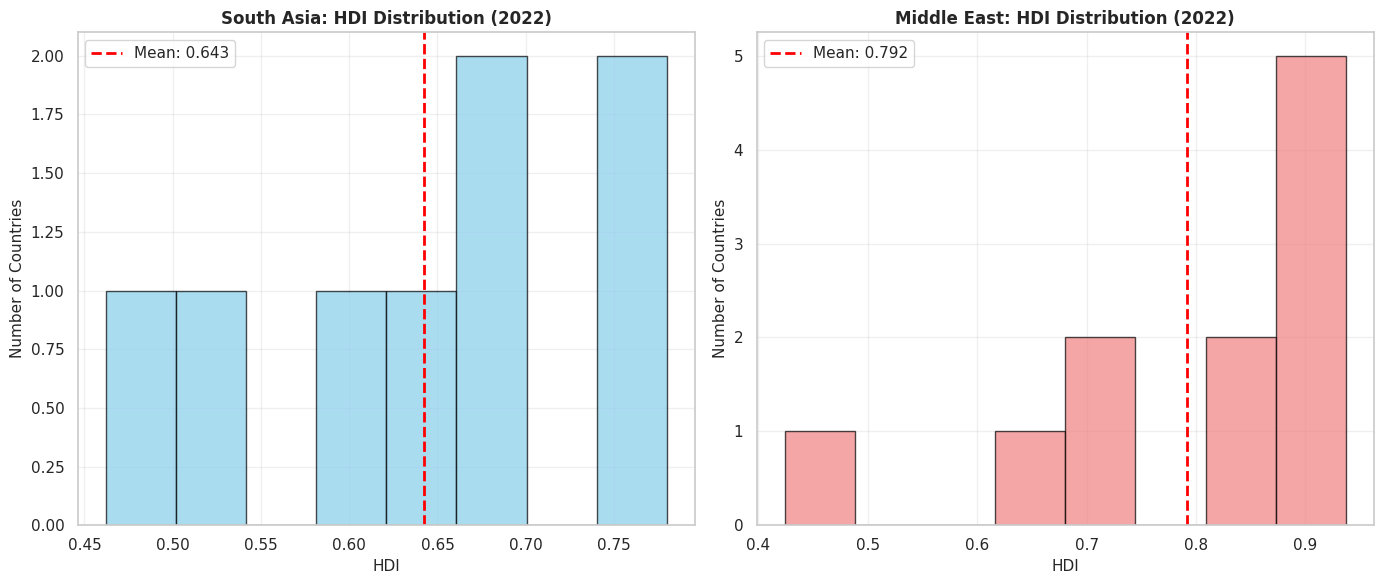

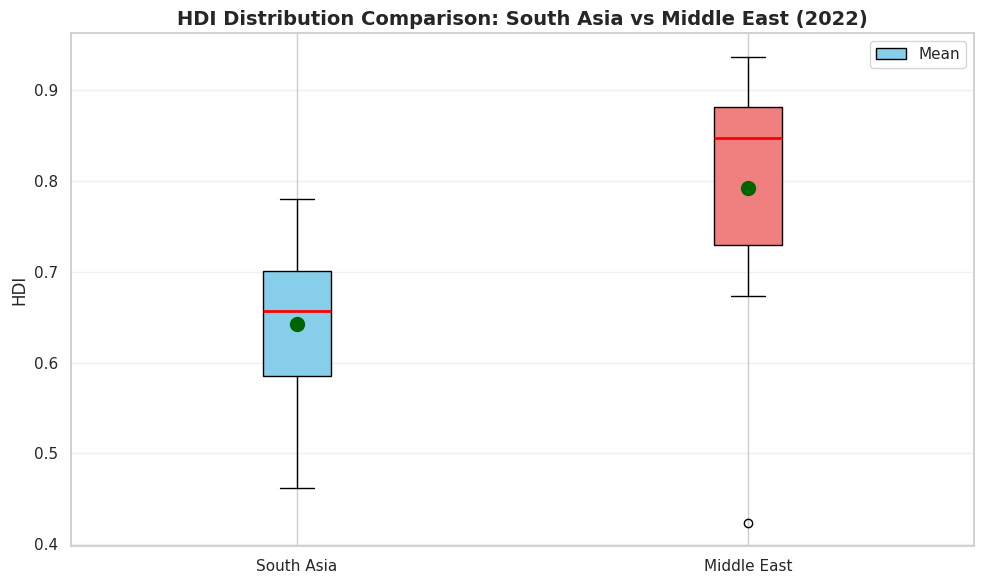

In [ ]:
print("=== HDI Disparity Analysis Within Regions ===")

# Use 2022 data for disparity analysis
sa_2022_hdi = sa_2022['hdi'].dropna()
me_2022_hdi = me_2022['hdi'].dropna()

print(f"South Asia: {len(sa_2022_hdi)} countries with HDI data")
print(f"Middle East: {len(me_2022_hdi)} countries with HDI data")

# Calculate disparity measures for each region
def calculate_disparity_measures(data, region_name):
    if len(data) == 0:
        return None

    measures = {
        'Region': region_name,
        'Count': len(data),
        'Mean': data.mean(),
        'Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Range': data.max() - data.min(),
        'Coefficient of Variation': data.std() / data.mean() if data.mean() != 0 else np.nan,
        'IQR': data.quantile(0.75) - data.quantile(0.25)
    }
    return measures

sa_measures = calculate_disparity_measures(sa_2022_hdi, 'South Asia')
me_measures = calculate_disparity_measures(me_2022_hdi, 'Middle East')

# Create disparity comparison dataframe
disparity_data = []
if sa_measures:
    disparity_data.append(sa_measures)
if me_measures:
    disparity_data.append(me_measures)

disparity_df = pd.DataFrame(disparity_data)

print("\n=== HDI Disparity Measures by Region (2022) ===")
display_disparity = disparity_df.copy()

# Format numbers
for col in display_disparity.columns:
    if col != 'Region':
        display_disparity[col] = display_disparity[col].apply(
            lambda x: f"{x:.3f}" if isinstance(x, (int, float)) and not pd.isna(x) else str(x))

print(display_disparity.to_string(index=False))

# Analyze which region exhibits more variation
if len(disparity_df) == 2:
    print("\n=== Variation Comparison ===")

    # Compare Coefficient of Variation (CV)
    sa_cv = disparity_df.loc[0, 'Coefficient of Variation']
    me_cv = disparity_df.loc[1, 'Coefficient of Variation']

    print(f"South Asia Coefficient of Variation: {sa_cv:.3f}")
    print(f"Middle East Coefficient of Variation: {me_cv:.3f}")

    if sa_cv > me_cv:
        print(f"South Asia exhibits more relative variation in HDI (higher CV)")
        print(f"This means HDI values are more spread out relative to the mean in South Asia")
    else:
        print(f"Middle East exhibits more relative variation in HDI (higher CV)")
        print(f"This means HDI values are more spread out relative to the mean in Middle East")

    # Compare Range
    sa_range = disparity_df.loc[0, 'Range']
    me_range = disparity_df.loc[1, 'Range']

    print(f"\nSouth Asia HDI Range: {sa_range:.3f} ({disparity_df.loc[0, 'Min']:.3f} to {disparity_df.loc[0, 'Max']:.3f})")
    print(f"Middle East HDI Range: {me_range:.3f} ({disparity_df.loc[1, 'Min']:.3f} to {disparity_df.loc[1, 'Max']:.3f})")

    if sa_range > me_range:
        print(f"South Asia has greater absolute HDI variation (larger range)")
        print(f"This indicates greater inequality in human development within South Asia")
    else:
        print(f"Middle East has greater absolute HDI variation (larger range)")
        print(f"This indicates greater inequality in human development within Middle East")

    # Compare Standard Deviation
    sa_std = disparity_df.loc[0, 'Std']
    me_std = disparity_df.loc[1, 'Std']

    print(f"\nSouth Asia HDI Standard Deviation: {sa_std:.3f}")
    print(f"Middle East HDI Standard Deviation: {me_std:.3f}")

    if sa_std > me_std:
        print(f"South Asia has greater absolute dispersion in HDI values")
    else:
        print(f"Middle East has greater absolute dispersion in HDI values")

    # Create visualization of HDI distributions
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # South Asia distribution
    axes[0].hist(sa_2022_hdi, bins=8, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(sa_2022_hdi.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sa_2022_hdi.mean():.3f}')
    axes[0].set_xlabel('HDI', fontsize=11)
    axes[0].set_ylabel('Number of Countries', fontsize=11)
    axes[0].set_title('South Asia: HDI Distribution (2022)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Middle East distribution
    axes[1].hist(me_2022_hdi, bins=8, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1].axvline(me_2022_hdi.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {me_2022_hdi.mean():.3f}')
    axes[1].set_xlabel('HDI', fontsize=11)
    axes[1].set_ylabel('Number of Countries', fontsize=11)
    axes[1].set_title('Middle East: HDI Distribution (2022)', fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Create box plot comparison
    plt.figure(figsize=(10, 6))
    box_data = [sa_2022_hdi, me_2022_hdi]
    box_labels = ['South Asia', 'Middle East']

    box_plot = plt.boxplot(box_data, labels=box_labels, patch_artist=True,
                          medianprops={'color': 'red', 'linewidth': 2})

    # Customize box colors
    colors = ['skyblue', 'lightcoral']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)

    plt.ylabel('HDI', fontsize=12)
    plt.title('HDI Distribution Comparison: South Asia vs Middle East (2022)',
              fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)

    # Add mean markers
    for i, data in enumerate(box_data, 1):
        mean_val = data.mean()
        plt.scatter(i, mean_val, color='darkgreen', s=100, zorder=3,
                   label='Mean' if i == 1 else "")

    plt.legend(['Mean'])
    plt.tight_layout()
    plt.show()

#Task 6: Correlation Analysis

=== Correlation Analysis: HDI with Other Metrics ===
Metrics for correlation analysis: ['gender_development', 'life_expectancy']

=== Correlation Coefficients ===
     Region             Metric Correlation  Sample_Size
 South Asia Gender Development       0.885            8
 South Asia    Life Expectancy       0.928            8
Middle East Gender Development       0.937           11
Middle East    Life Expectancy       0.945           11


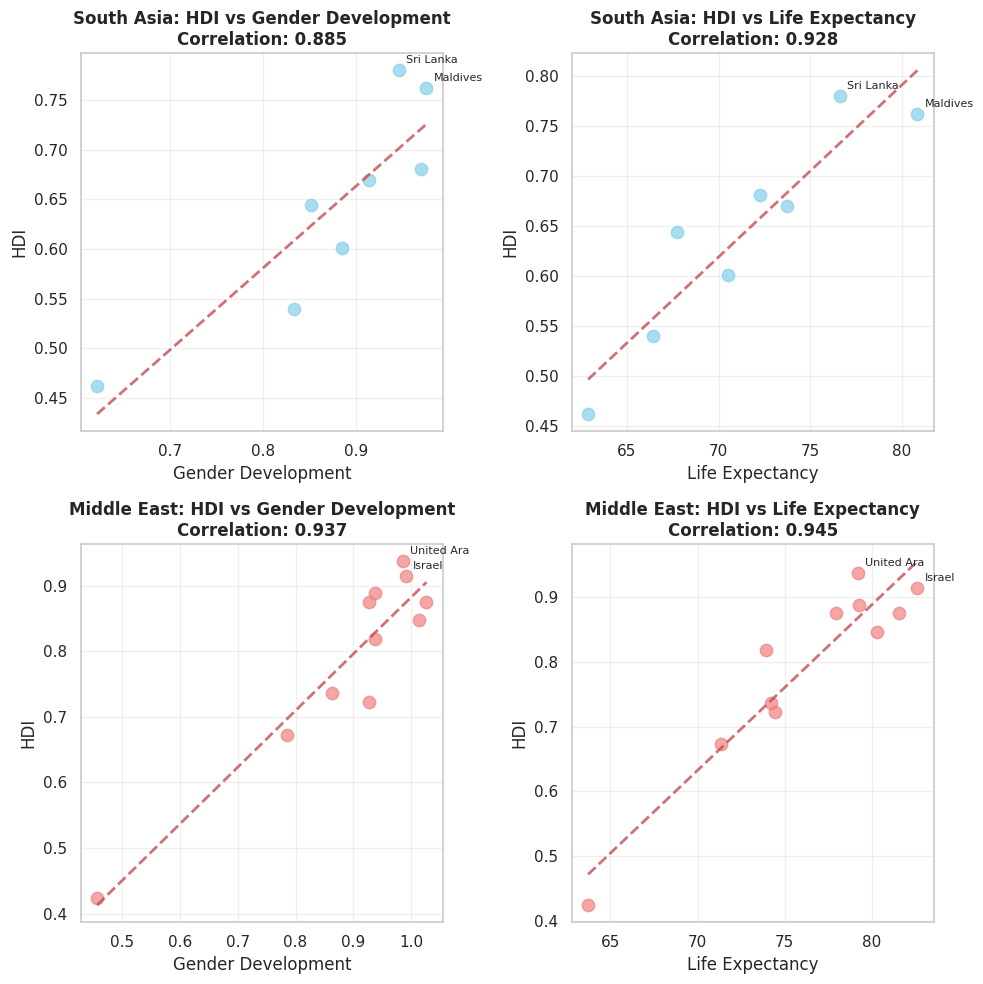


=== Interpretation of Correlation Results ===

South Asia - Gender Development:
  Correlation: 0.885 (Very Strong, positive)
  Sample Size: 8 countries
  Interpretation: As gender development increases, HDI tends to increase

South Asia - Life Expectancy:
  Correlation: 0.928 (Very Strong, positive)
  Sample Size: 8 countries
  Interpretation: As life expectancy increases, HDI tends to increase

Middle East - Gender Development:
  Correlation: 0.937 (Very Strong, positive)
  Sample Size: 11 countries
  Interpretation: As gender development increases, HDI tends to increase

Middle East - Life Expectancy:
  Correlation: 0.945 (Very Strong, positive)
  Sample Size: 11 countries
  Interpretation: As life expectancy increases, HDI tends to increase

=== Regional Comparison of Correlations ===

Gender Development:
  South Asia: 0.885
  Middle East: 0.937
  Stronger correlation in Middle East

Life Expectancy:
  South Asia: 0.928
  Middle East: 0.945
  Stronger correlation in Middle East


In [ ]:
print("=== Correlation Analysis: HDI with Other Metrics ===")

# Prepare data for correlation analysis (2022)
sa_corr_data = sa_2022.copy()
me_corr_data = me_2022.copy()

# Define metrics for correlation analysis
corr_metrics = []
if 'gender_development' in sa_corr_data.columns:
    corr_metrics.append('gender_development')
if 'life_expectancy' in sa_corr_data.columns:
    corr_metrics.append('life_expectancy')

print(f"Metrics for correlation analysis: {corr_metrics}")

if not corr_metrics:
    print("No metrics available for correlation analysis")
else:
    # Calculate correlations for each region
    correlation_results = []

    for region_name, region_data in [('South Asia', sa_corr_data), ('Middle East', me_corr_data)]:
        for metric in corr_metrics:
            if metric in region_data.columns:
                # Drop rows with missing values for correlation
                clean_data = region_data[['hdi', metric]].dropna()
                if len(clean_data) >= 2:  # Need at least 2 points for correlation
                    correlation = clean_data['hdi'].corr(clean_data[metric])
                    correlation_results.append({
                        'Region': region_name,
                        'Metric': metric.replace('_', ' ').title(),
                        'Correlation': correlation,
                        'Sample_Size': len(clean_data)
                    })

    if correlation_results:
        corr_df = pd.DataFrame(correlation_results)

        print("\n=== Correlation Coefficients ===")
        display_corr = corr_df.copy()
        display_corr['Correlation'] = display_corr['Correlation'].apply(lambda x: f"{x:.3f}")
        print(display_corr.to_string(index=False))

        # Create scatter plots with trendlines
        n_metrics = len(corr_metrics)
        fig, axes = plt.subplots(2, n_metrics, figsize=(5*n_metrics, 10))
        if n_metrics == 1:
            axes = axes.reshape(2, 1)

        for i, metric in enumerate(corr_metrics):
            metric_name = metric.replace('_', ' ').title()

            # South Asia plot
            if i < n_metrics:
                sa_plot_data = sa_corr_data[['hdi', metric]].dropna()
                if len(sa_plot_data) >= 2:
                    axes[0, i].scatter(sa_plot_data[metric], sa_plot_data['hdi'],
                                      alpha=0.7, s=80, color='skyblue')

                    # Add trendline
                    z = np.polyfit(sa_plot_data[metric], sa_plot_data['hdi'], 1)
                    p = np.poly1d(z)
                    x_line = np.linspace(sa_plot_data[metric].min(), sa_plot_data[metric].max(), 100)
                    axes[0, i].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

                    # Add correlation coefficient
                    corr_value = sa_plot_data['hdi'].corr(sa_plot_data[metric])
                    axes[0, i].set_title(f'South Asia: HDI vs {metric_name}\nCorrelation: {corr_value:.3f}',
                                        fontweight='bold')
                    axes[0, i].set_xlabel(metric_name)
                    axes[0, i].set_ylabel('HDI')
                    axes[0, i].grid(alpha=0.3)

                    # Add country labels for extreme points
                    for idx, row in sa_plot_data.nlargest(2, 'hdi').iterrows():
                        country = sa_corr_data.loc[idx, 'country']
                        axes[0, i].annotate(country[:10],
                                           xy=(row[metric], row['hdi']),
                                           xytext=(5, 5), textcoords='offset points',
                                           fontsize=8)

            # Middle East plot
            if i < n_metrics:
                me_plot_data = me_corr_data[['hdi', metric]].dropna()
                if len(me_plot_data) >= 2:
                    axes[1, i].scatter(me_plot_data[metric], me_plot_data['hdi'],
                                      alpha=0.7, s=80, color='lightcoral')

                    # Add trendline
                    z = np.polyfit(me_plot_data[metric], me_plot_data['hdi'], 1)
                    p = np.poly1d(z)
                    x_line = np.linspace(me_plot_data[metric].min(), me_plot_data[metric].max(), 100)
                    axes[1, i].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

                    # Add correlation coefficient
                    corr_value = me_plot_data['hdi'].corr(me_plot_data[metric])
                    axes[1, i].set_title(f'Middle East: HDI vs {metric_name}\nCorrelation: {corr_value:.3f}',
                                        fontweight='bold')
                    axes[1, i].set_xlabel(metric_name)
                    axes[1, i].set_ylabel('HDI')
                    axes[1, i].grid(alpha=0.3)

                    # Add country labels for extreme points
                    for idx, row in me_plot_data.nlargest(2, 'hdi').iterrows():
                        country = me_corr_data.loc[idx, 'country']
                        axes[1, i].annotate(country[:10],
                                           xy=(row[metric], row['hdi']),
                                           xytext=(5, 5), textcoords='offset points',
                                           fontsize=8)

        plt.tight_layout()
        plt.show()

        # Interpret correlation strengths
        print("\n=== Interpretation of Correlation Results ===")

        def interpret_correlation_strength(corr):
            abs_corr = abs(corr)
            if abs_corr >= 0.8:
                return "Very Strong"
            elif abs_corr >= 0.6:
                return "Strong"
            elif abs_corr >= 0.4:
                return "Moderate"
            elif abs_corr >= 0.2:
                return "Weak"
            else:
                return "Very Weak"

        for idx, row in corr_df.iterrows():
            strength = interpret_correlation_strength(row['Correlation'])
            direction = "positive" if row['Correlation'] > 0 else "negative"

            print(f"\n{row['Region']} - {row['Metric']}:")
            print(f"  Correlation: {row['Correlation']:.3f} ({strength}, {direction})")
            print(f"  Sample Size: {row['Sample_Size']} countries")

            if row['Correlation'] > 0:
                print(f"  Interpretation: As {row['Metric'].lower()} increases, HDI tends to increase")
            elif row['Correlation'] < 0:
                print(f"  Interpretation: As {row['Metric'].lower()} increases, HDI tends to decrease")
            else:
                print(f"  Interpretation: No linear relationship with HDI")

        # Compare correlations across regions
        print("\n=== Regional Comparison of Correlations ===")

        for metric in corr_metrics:
            metric_name = metric.replace('_', ' ').title()
            sa_corr = corr_df[(corr_df['Region'] == 'South Asia') &
                            (corr_df['Metric'] == metric_name)]['Correlation']
            me_corr = corr_df[(corr_df['Region'] == 'Middle East') &
                            (corr_df['Metric'] == metric_name)]['Correlation']

            if not sa_corr.empty and not me_corr.empty:
                sa_value = sa_corr.iloc[0]
                me_value = me_corr.iloc[0]

                print(f"\n{metric_name}:")
                print(f"  South Asia: {sa_value:.3f}")
                print(f"  Middle East: {me_value:.3f}")

                if abs(sa_value) > abs(me_value):
                    print(f"  Stronger correlation in South Asia")
                else:
                    print(f"  Stronger correlation in Middle East")

                # Check if correlations are significantly different
                diff = abs(sa_value) - abs(me_value)
                if abs(diff) > 0.2:
                    print(f"  Note: Substantial difference in correlation strength ({diff:+.3f})")
    else:
        print("No correlation results available")

#Task 7: Outlier Detection

=== Outlier Detection in HDI and GNI per Capita ===
Columns available for outlier detection: ['hdi', 'gross_inc_percap']

=== South Asia - Hdi Outliers ===
Total countries: 8
Outliers detected: 0
IQR bounds: [0.412, 0.875]
IQR: 0.116

=== South Asia - Gross Inc Percap Outliers ===
Total countries: 8
Outliers detected: 0
IQR bounds: [-3822.566, 19803.188]
IQR: 5906.439

=== Middle East - Hdi Outliers ===
Total countries: 11
Outliers detected: 1
IQR bounds: [0.502, 1.109]
IQR: 0.152
Outlier countries:
  Yemen: 0.424 (below lower bound)

=== Middle East - Gross Inc Percap Outliers ===
Total countries: 11
Outliers detected: 0
IQR bounds: [-53501.934, 117980.855]
IQR: 42870.697

=== Outlier Detection Summary ===
     Region           Metric  Total_Countries  Outlier_Count Lower_Bound Upper_Bound       IQR
 South Asia              HDI                8              0       0.412       0.875     0.116
 South Asia Gross Inc Percap                8              0   -3822.566   19803.188  5906.43

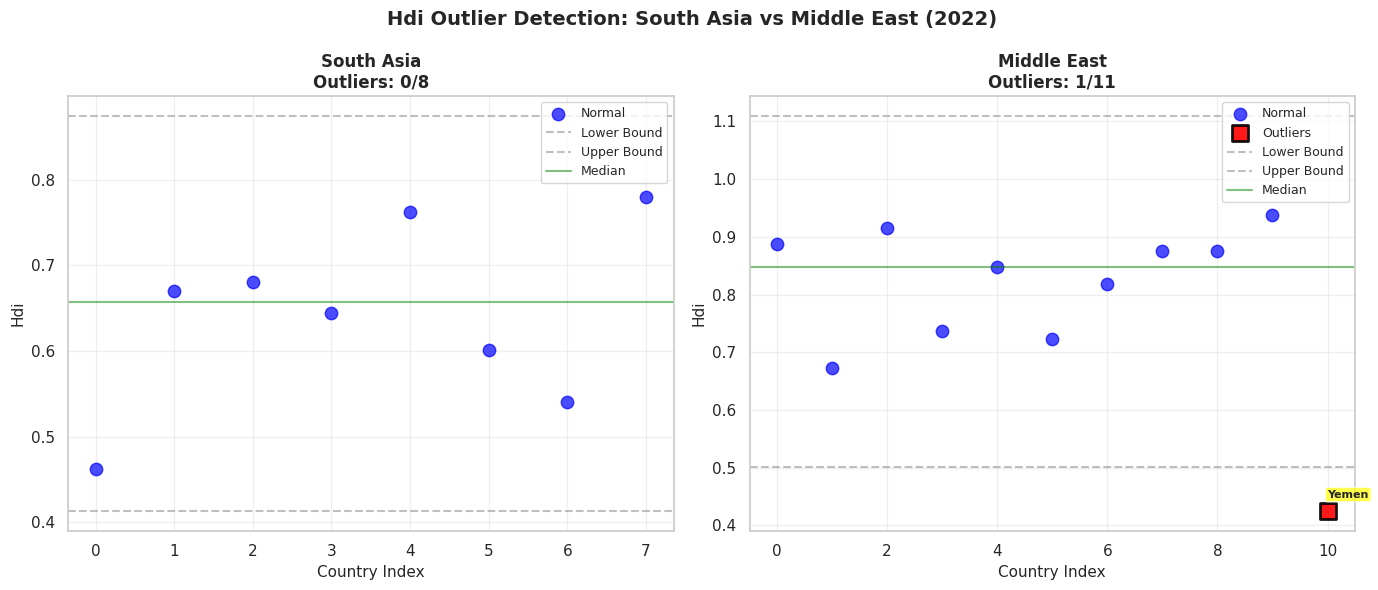

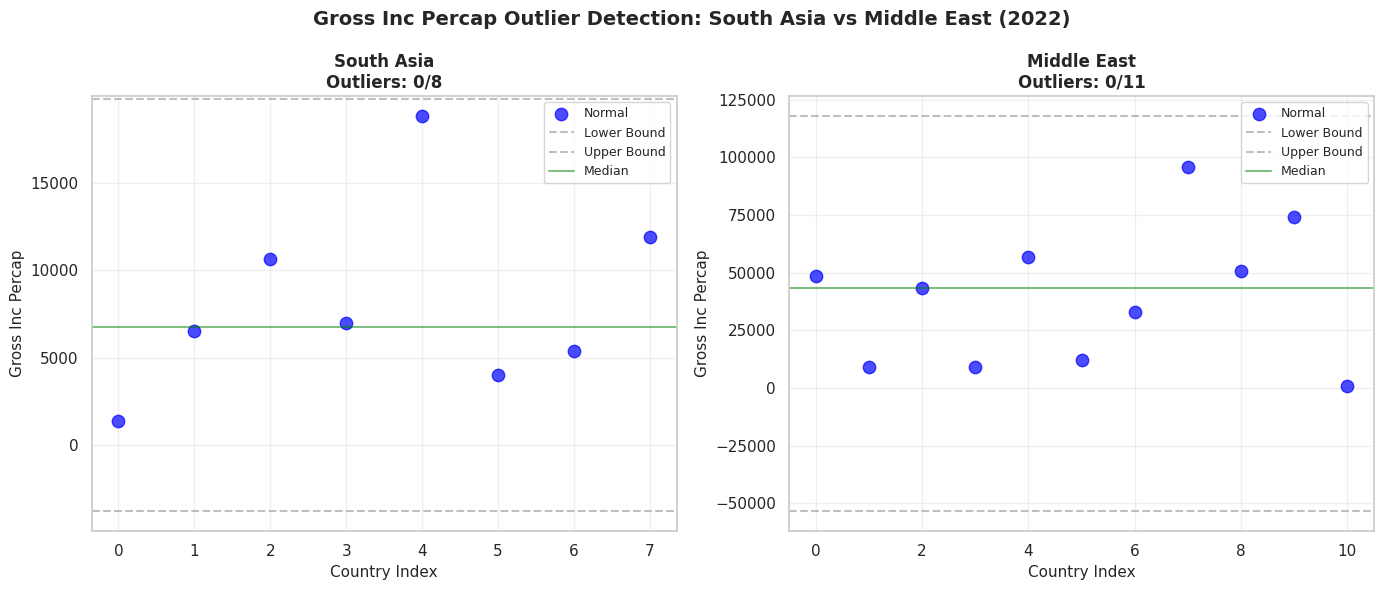


=== Analysis of Outlier Significance ===

South Asia Outlier Analysis:

  HDI:
    0 outliers out of 8 countries (0.0%)
    Low outlier percentage - relatively homogeneous region
    IQR covers 11.6% of possible HDI range

  Gross Inc Percap:
    0 outliers out of 8 countries (0.0%)
    Low outlier percentage - relatively homogeneous region

Middle East Outlier Analysis:

  HDI:
    1 outliers out of 11 countries (9.1%)
    Low outlier percentage - relatively homogeneous region
    IQR covers 15.2% of possible HDI range

  Gross Inc Percap:
    0 outliers out of 11 countries (0.0%)
    Low outlier percentage - relatively homogeneous region

=== Implications of Outliers ===

1. High HDI outliers may indicate:
   - Countries with exceptional human development achievements
   - Potential regional leaders or models for development
   - Countries benefiting from specific advantages (e.g., natural resources, strategic location)

2. Low HDI outliers may indicate:
   - Countries facing signif

In [ ]:
print("=== Outlier Detection in HDI and GNI per Capita ===")

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

# Prepare data for outlier detection (2022)
sa_outlier_data = sa_2022.copy()
me_outlier_data = me_2022.copy()

# Check available columns for outlier detection
outlier_columns = []
if 'hdi' in sa_outlier_data.columns:
    outlier_columns.append('hdi')
if 'gross_inc_percap' in sa_outlier_data.columns:
    outlier_columns.append('gross_inc_percap')

print(f"Columns available for outlier detection: {outlier_columns}")

if not outlier_columns:
    print("No columns available for outlier detection")
else:
    # Detect outliers for each region and each column
    outlier_results = []

    for region_name, region_data in [('South Asia', sa_outlier_data), ('Middle East', me_outlier_data)]:
        for column in outlier_columns:
            if column in region_data.columns:
                clean_data = region_data[['country', column]].dropna()
                if len(clean_data) >= 4:  # Need at least 4 points for meaningful IQR
                    outliers, lower_bound, upper_bound, iqr = detect_outliers_iqr(clean_data, column)

                    outlier_results.append({
                        'Region': region_name,
                        'Metric': column.upper() if column == 'hdi' else column.replace('_', ' ').title(),
                        'Total_Countries': len(clean_data),
                        'Outlier_Count': len(outliers),
                        'Lower_Bound': lower_bound,
                        'Upper_Bound': upper_bound,
                        'IQR': iqr
                    })

                    print(f"\n=== {region_name} - {column.replace('_', ' ').title()} Outliers ===")
                    print(f"Total countries: {len(clean_data)}")
                    print(f"Outliers detected: {len(outliers)}")
                    print(f"IQR bounds: [{lower_bound:.3f}, {upper_bound:.3f}]")
                    print(f"IQR: {iqr:.3f}")

                    if len(outliers) > 0:
                        print("Outlier countries:")
                        for idx, row in outliers.iterrows():
                            value = row[column]
                            bound_type = "above upper" if value > upper_bound else "below lower"
                            print(f"  {row['country']}: {value:.3f} ({bound_type} bound)")

    if outlier_results:
        # Create summary dataframe
        outlier_summary = pd.DataFrame(outlier_results)

        print("\n=== Outlier Detection Summary ===")
        display_summary = outlier_summary.copy()

        # Format numbers
        for col in ['Lower_Bound', 'Upper_Bound', 'IQR']:
            if col in display_summary.columns:
                display_summary[col] = display_summary[col].apply(lambda x: f"{x:.3f}")

        print(display_summary[['Region', 'Metric', 'Total_Countries', 'Outlier_Count',
                              'Lower_Bound', 'Upper_Bound', 'IQR']].to_string(index=False))

        # Create scatter plots highlighting outliers
        for column in outlier_columns:
            column_name = column.replace('_', ' ').title()

            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            fig.suptitle(f'{column_name} Outlier Detection: South Asia vs Middle East (2022)',
                        fontsize=14, fontweight='bold')

            for ax_idx, (region_name, region_data) in enumerate([('South Asia', sa_outlier_data),
                                                               ('Middle East', me_outlier_data)]):
                if column in region_data.columns:
                    clean_data = region_data[['country', column]].dropna()

                    if len(clean_data) >= 4:
                        outliers, lower_bound, upper_bound, iqr = detect_outliers_iqr(clean_data, column)

                        # Separate normal points and outliers
                        outlier_countries = set(outliers['country'])
                        normal_data = clean_data[~clean_data['country'].isin(outlier_countries)]
                        outlier_data = clean_data[clean_data['country'].isin(outlier_countries)]

                        # Create scatter plot
                        countries = list(range(len(clean_data)))

                        # Plot normal points
                        axes[ax_idx].scatter(range(len(normal_data)), normal_data[column],
                                           alpha=0.7, s=80, color='blue', label='Normal')

                        # Plot outliers
                        if len(outlier_data) > 0:
                            outlier_indices = [list(clean_data['country']).index(c) for c in outlier_data['country']]
                            axes[ax_idx].scatter(outlier_indices, outlier_data[column],
                                               alpha=0.9, s=120, color='red', label='Outliers',
                                               edgecolors='black', linewidth=2, marker='s')

                        # Add bounds lines
                        axes[ax_idx].axhline(y=lower_bound, color='gray', linestyle='--',
                                           alpha=0.5, label='Lower Bound')
                        axes[ax_idx].axhline(y=upper_bound, color='gray', linestyle='--',
                                           alpha=0.5, label='Upper Bound')
                        axes[ax_idx].axhline(y=clean_data[column].median(), color='green',
                                           linestyle='-', alpha=0.5, label='Median')

                        axes[ax_idx].set_xlabel('Country Index', fontsize=11)
                        axes[ax_idx].set_ylabel(column_name, fontsize=11)
                        axes[ax_idx].set_title(f'{region_name}\nOutliers: {len(outliers)}/{len(clean_data)}',
                                              fontweight='bold')
                        axes[ax_idx].legend(fontsize=9)
                        axes[ax_idx].grid(alpha=0.3)

                        # Add value labels for outliers
                        if len(outlier_data) > 0:
                            for idx, row in outlier_data.iterrows():
                                country_idx = list(clean_data['country']).index(row['country'])
                                axes[ax_idx].annotate(row['country'][:10],
                                                    xy=(country_idx, row[column]),
                                                    xytext=(0, 10), textcoords='offset points',
                                                    fontsize=8, fontweight='bold',
                                                    bbox=dict(boxstyle='round,pad=0.2',
                                                            facecolor='yellow', alpha=0.7))
                else:
                    axes[ax_idx].text(0.5, 0.5, f'{column_name} data\nnot available',
                                     ha='center', va='center', fontsize=12,
                                     transform=axes[ax_idx].transAxes)
                    axes[ax_idx].set_title(region_name, fontweight='bold')

            plt.tight_layout()
            plt.show()

        # Analyze significance of outliers
        print("\n=== Analysis of Outlier Significance ===")

        for region_name in ['South Asia', 'Middle East']:
            region_outliers = outlier_summary[outlier_summary['Region'] == region_name]

            if not region_outliers.empty:
                print(f"\n{region_name} Outlier Analysis:")

                for idx, row in region_outliers.iterrows():
                    metric = row['Metric']
                    outlier_pct = (row['Outlier_Count'] / row['Total_Countries']) * 100

                    print(f"\n  {metric}:")
                    print(f"    {row['Outlier_Count']} outliers out of {row['Total_Countries']} countries ({outlier_pct:.1f}%)")

                    if outlier_pct > 25:
                        print(f"    High outlier percentage - may indicate diverse development levels")
                    elif outlier_pct > 10:
                        print(f"    Moderate outlier percentage - some exceptional cases")
                    else:
                        print(f"    Low outlier percentage - relatively homogeneous region")

                    # Check IQR relative to range
                    if 'hdi' in metric.lower():
                        data_range = 1.0  # HDI range is 0-1
                        iqr_ratio = row['IQR'] / data_range
                        print(f"    IQR covers {iqr_ratio*100:.1f}% of possible HDI range")

        # Discuss implications
        print("\n=== Implications of Outliers ===")
        print("\n1. High HDI outliers may indicate:")
        print("   - Countries with exceptional human development achievements")
        print("   - Potential regional leaders or models for development")
        print("   - Countries benefiting from specific advantages (e.g., natural resources, strategic location)")

        print("\n2. Low HDI outliers may indicate:")
        print("   - Countries facing significant development challenges")
        print("   - Conflict-affected or politically unstable nations")
        print("   - Countries needing targeted development assistance")

        print("\n3. High GNI outliers may indicate:")
        print("   - Resource-rich economies (e.g., oil-producing nations)")
        print("   - Financial or service hubs")
        print("   - Countries with high income inequality")

        print("\n4. Regional patterns:")
        print("   - Regions with many outliers may have greater internal inequality")
        print("   - Regions with few outliers may be more homogeneous in development")
        print("   - Outlier patterns can inform regional development strategies")
    else:
        print("No outlier results to analyze")

#Summary and File Generation

In [ ]:
# SUMMARY AND FILE GENERATION


# List all files generated
import os

print("\nFiles generated during analysis:")
generated_files = [
    'HDI_category_added.csv',
    'HDI_problem1B.csv',
    'HDI_SouthAsia.csv',
    'HDI_SouthAsia_2020_2022.csv',
    'HDI_MiddleEast_2020_2022.csv',
]

for file in generated_files:
    if os.path.exists(file):
        print(f" {file}")
    else:
        print(f" {file} (not found)")


print("\nKEY FINDINGS SUMMARY")


print("\n1. PROBLEM 1A (2022 HDI Analysis):")
print("   - Dataset contains 13 countries for 2022")
print("   - HDI categories successfully added (Low, Medium, High, Very High)")
print("   - Data cleaned and saved as 'HDI_category_added.csv'")

print("\n2. PROBLEM 1B (2020-2022 Trend Analysis):")
print("   - Analyzed HDI trends for 5 selected countries")
print("   - Created visualizations showing regional averages and distributions")
print("   - COVID-19 impacts visible in some countries' HDI trajectories")

print("\n3. PROBLEM 2 (Advanced South Asia Analysis):")
print("   - Created Composite Score (30% life expectancy + 30% GNI)")
print("   - Identified outliers in HDI and GNI per capita")
print("   - Analyzed metric relationships and GNI-HDI gaps")
print("   - Found varying development patterns within South Asia")

print("\n4. PROBLEM 3 (Regional Comparison):")
print("   - Compared South Asia vs Middle East (2020-2022)")
print("   - Middle East generally has higher average HDI")
print("   - South Asia shows more internal variation in HDI")
print("   - Different correlation patterns between regions")




Files generated during analysis:
 HDI_category_added.csv
 HDI_problem1B.csv
 HDI_SouthAsia.csv
 HDI_SouthAsia_2020_2022.csv
 HDI_MiddleEast_2020_2022.csv

KEY FINDINGS SUMMARY

1. PROBLEM 1A (2022 HDI Analysis):
   - Dataset contains 13 countries for 2022
   - HDI categories successfully added (Low, Medium, High, Very High)
   - Data cleaned and saved as 'HDI_category_added.csv'

2. PROBLEM 1B (2020-2022 Trend Analysis):
   - Analyzed HDI trends for 5 selected countries
   - Created visualizations showing regional averages and distributions
   - COVID-19 impacts visible in some countries' HDI trajectories

3. PROBLEM 2 (Advanced South Asia Analysis):
   - Created Composite Score (30% life expectancy + 30% GNI)
   - Identified outliers in HDI and GNI per capita
   - Analyzed metric relationships and GNI-HDI gaps
   - Found varying development patterns within South Asia

4. PROBLEM 3 (Regional Comparison):
   - Compared South Asia vs Middle East (2020-2022)
   - Middle East generally ha

In [ ]:
from google.colab import files

# List of files to download
files_to_download = [
    'HDI_category_added.csv',
    'HDI_problem1B.csv',
    'HDI_SouthAsia.csv',
    'HDI_SouthAsia_2020_2022.csv',
    'HDI_MiddleEast_2020_2022.csv'
]

for file in files_to_download:
    try:
        files.download(file)
        print(f" Downloaded: {file}")
    except:
        print(f" Could not download: {file}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: HDI_category_added.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: HDI_problem1B.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: HDI_SouthAsia.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: HDI_SouthAsia_2020_2022.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: HDI_MiddleEast_2020_2022.csv
